https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import xgboost as xgb

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### DO PRZEDSTAWIENIA W PREZENTACJI

1. Wartości wieku - poniżej 2 lat wiek podany po przecinku - - przedstawienie, że wartości są w porządku
2. Wartości work_type i dziwne wartości dla wieku
3. Poziomy glukozy - przedstawienie, że one są w porządku
4. Występowanie płci "inne" w zawrotnej liczbie 1 sztuka

Co zrobiliśmy ze zbiorem danych:
0. Zbadanie wartości poszczególnych kolumn (do połączenia w prezentacji z powyższym)
1. Usunięcie kolumny id
2. Ustandaryzowanie nazw kolumn



#### Usunięcie id

In [8]:
df = df.drop('id', axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Analiza eksploracyjna

In [9]:
df.shape

(5110, 11)

In [10]:
df.info()
#w bmi są braki danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Ustandaryzowanie nazw kolumn

In [12]:
df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

#### Powrót do analizy eksploracyjnej

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [15]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [16]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [18]:
df.residence_type.value_counts()

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

In [19]:
df.smoking_status.value_counts()
#Unknown to w sumie taki brak danych, a tego jest dość sporo

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [20]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [21]:
df.age.value_counts().sort_index().head(25)
#UWAGA - do 2 r.ż. wiek jest podany po przecinku (prawdopodobnie to jest liczba dni / 365)

0.08     2
0.16     3
0.24     5
0.32     5
0.40     2
0.48     3
0.56     5
0.64     4
0.72     5
0.80     4
0.88     5
1.00     5
1.08     8
1.16     4
1.24     8
1.32     8
1.40     3
1.48     6
1.56     4
1.64     8
1.72     6
1.80     9
1.88     8
2.00    55
3.00    46
Name: age, dtype: int64

In [22]:
df[(df['age']>0) & (df['age']<2)].age.count()

120

In [23]:
#Sprawdzenie, czy wszyscy pacjenci poniżej 2 lat są oznaczeni jako dzieciaki
df[(df['age']>0) & (df['age']<2)].work_type.value_counts()

children    120
Name: work_type, dtype: int64

In [24]:
df.groupby(['work_type'])['age'].agg([min, max, 'count'])
# No fajnie xD pracujące dzieciaki xD

,min,max,count
work_type,,,
Govt_job,14.00,82.0,657
Never_worked,13.00,23.0,22
Private,8.00,82.0,2925
Self-employed,7.00,82.0,819
children,0.08,16.0,687


In [25]:
df.query('age == 16.0 & work_type == "Private"')

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
538,Female,16.0,0,0,No,Private,Rural,155.43,27.3,never smoked,0
681,Female,16.0,0,0,No,Private,Rural,74.98,21.4,never smoked,0
972,Female,16.0,0,0,No,Private,Urban,87.98,22.4,never smoked,0
1469,Female,16.0,0,0,No,Private,Rural,70.15,21.5,Unknown,0
1726,Female,16.0,0,0,No,Private,Urban,58.02,22.5,Unknown,0
1744,Male,16.0,0,0,No,Private,Rural,122.46,18.7,never smoked,0
1763,Male,16.0,0,0,No,Private,Rural,111.93,32.2,never smoked,0
1821,Male,16.0,0,0,No,Private,Rural,133.20,26.3,Unknown,0
2195,Male,16.0,0,0,No,Private,Urban,134.80,22.4,never smoked,0
2254,Female,16.0,0,0,No,Private,Rural,94.03,25.7,never smoked,0


In [26]:
df.query('age <16  & work_type == "Private"')

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
455,Male,13.0,0,0,No,Private,Urban,92.14,23.2,never smoked,0
950,Male,15.0,0,0,No,Private,Urban,57.94,41.7,Unknown,0
1039,Female,15.0,0,0,No,Private,Rural,95.43,25.0,Unknown,0
1063,Female,13.0,0,0,No,Private,Rural,60.69,24.0,smokes,0
1197,Female,14.0,0,0,No,Private,Rural,84.46,21.8,Unknown,0
1242,Male,15.0,0,0,No,Private,Rural,61.61,27.8,never smoked,0
1249,Male,15.0,0,0,No,Private,Rural,78.59,25.1,Unknown,0
1265,Female,14.0,0,0,No,Private,Rural,118.81,24.7,Unknown,0
1623,Female,15.0,0,0,No,Private,Rural,69.38,28.4,never smoked,0


In [27]:
# Na kagglu nic nie ma, co to może znaczyć, może dzieciaki pomagają rodzicom w rodzinnym biznesie
# albo łapały jakieś wakacyjne roboty/staże albo różni ludzie zbierali dane i jeden oznaczył children, a drugi never_worked.

#### poziom cukru we krwi
https://www.nn.pl/blog/posts/2021/jaki-powinien-byc-poziom-cukru-we-krwi.html
70 - 140 - dorośli
80 - 180 - osoby starsze
80 - 100 - dzieci (na czczo)

https://www.medonet.pl/badania,poziom-cukru-we-krwi---normy--tabela--objawy-hiper--i-hipoglikemii,artykul,1585409.html#jak-mierzy-sie-poziom-cukru-we-krwi
powyżej 200 - cukrzyca

kobiety w ciąży mogą mieć wyższy poziom (180)

In [28]:
# W naszych danych min i max jest w porządku - mamy cukrzyków w danych i osoby bliskie hipoglikemii

#### bmi

##### Normy bmi
https://www.medicover.pl/kalkulator/bmi/
<br>
<16 - wygłodzenie <br>
\>= 40 - otyłość III stopnia

bardziej przydatne byłyby zmienne wzrost i waga niż wyliczone bmi, ponieważ dla dzieciaków właściwie nie do końca powinno
się takie coś liczyć; osoby starsze też mają mniej mięśni, więc dla nich ten wskaźnik inaczej się interpretuje niż u młodszych osób

In [29]:
df['bmi'].isna().sum()

201

In [30]:
df.bmi.value_counts().sort_index().tail(10)
# mamy wartości ponad 90 - z jednej strony wydaje się to trochę przegięte, z drugiej strony przy wadze 310 kg i wzroście 180cm
# bmi wychodzi 95, więc jak na moje to jest możliwe, zwłaszcza że najgrubszy człowiek świata ważył ponad 600 kg

61.2    1
61.6    1
63.3    1
64.4    1
64.8    1
66.8    1
71.9    1
78.0    1
92.0    1
97.6    1
Name: bmi, dtype: int64

In [31]:
# bmi w większośći przypadków bedzie niższe u dzieci
df.groupby(['work_type'])['bmi'].agg([min, max, 'mean', 'count'])

,min,max,mean,count
work_type,,,,
Govt_job,16.0,57.7,30.522063,630
Never_worked,14.6,44.9,25.545455,22
Private,11.5,97.6,30.304625,2811
Self-employed,11.3,64.8,30.211871,775
children,10.3,41.7,20.038003,671


In [32]:
df['age_cat'] = np.where(df['age']<= 16, '16 or less',
                   np.where(df['age']<30, '17 - 29',
                   np.where(df['age']<45, '30 - 44',
                   np.where(df['age']<65, '45 - 59', '60 or greater'))))

In [33]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60 or greater
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,45 - 59
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60 or greater
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45 - 59
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60 or greater


In [34]:
df['age_cat'].value_counts()

45 - 59          1550
60 or greater    1027
30 - 44          1018
16 or less        796
17 - 29           719
Name: age_cat, dtype: int64

In [35]:
df.groupby(['age_cat'])['bmi'].agg([min, max, 'mean', 'count'])

,min,max,mean,count
age_cat,,,,
16 or less,10.3,48.8,20.787661,778
17 - 29,16.0,97.6,27.991489,705
30 - 44,11.5,92.0,31.270978,982
45 - 59,14.2,66.8,31.558753,1491
60 or greater,11.3,54.6,29.557083,953


In [36]:
null_bmi_df = df[df['bmi'].isnull()]

In [37]:
null_bmi_df.describe()
# nulle są nie tylko u noworodków

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


In [38]:
null_bmi_df.groupby(['age_cat'])['age_cat'].count()
#właściwie najwięcej nulli w bmi jest u osób starszych

age_cat
16 or less       18
17 - 29          14
30 - 44          36
45 - 59          59
60 or greater    74
Name: age_cat, dtype: int64

***

### Wykresy

In [39]:
col_list = df[['age', 'avg_glucose_level', 'bmi']].columns.tolist()

In [40]:
col_list

['age', 'avg_glucose_level', 'bmi']

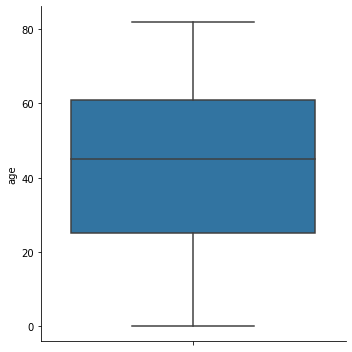

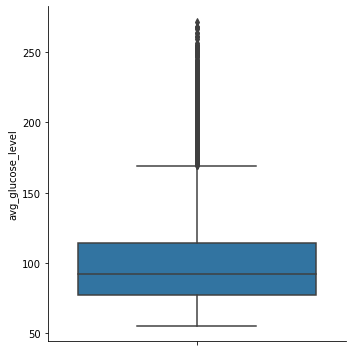

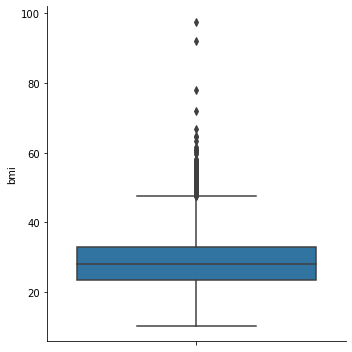

In [41]:
for var in col_list:
    sns.catplot(data=df, y=var, kind='box');

In [42]:
features = df[col_list].values.tolist()

In [43]:
def histogram(df: pd.DataFrame, col_list: list, n_bin: int = 6):
    for col in col_list:
        plt.figure(figsize = (12,10))
        plt.hist(df[col], bins = n_bin)
        plt.title(col)

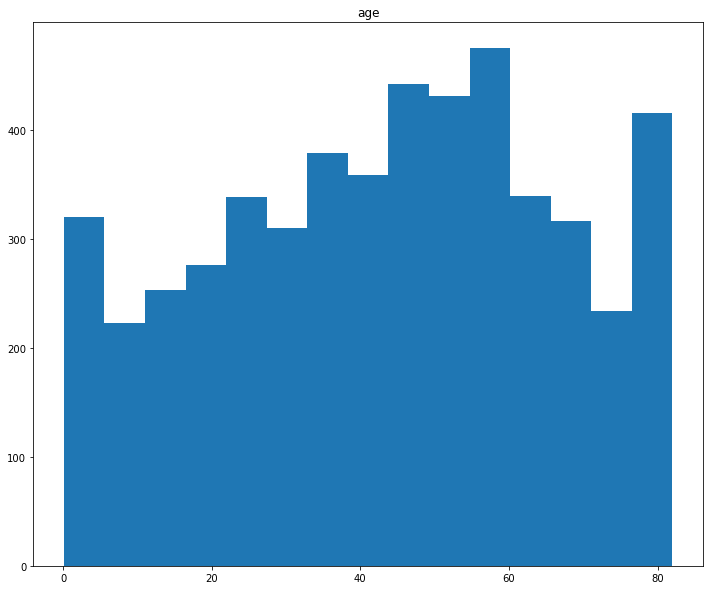

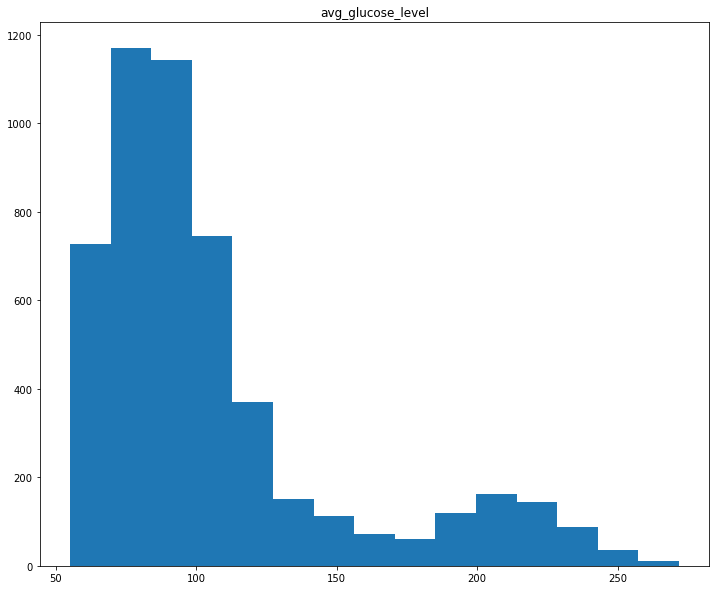

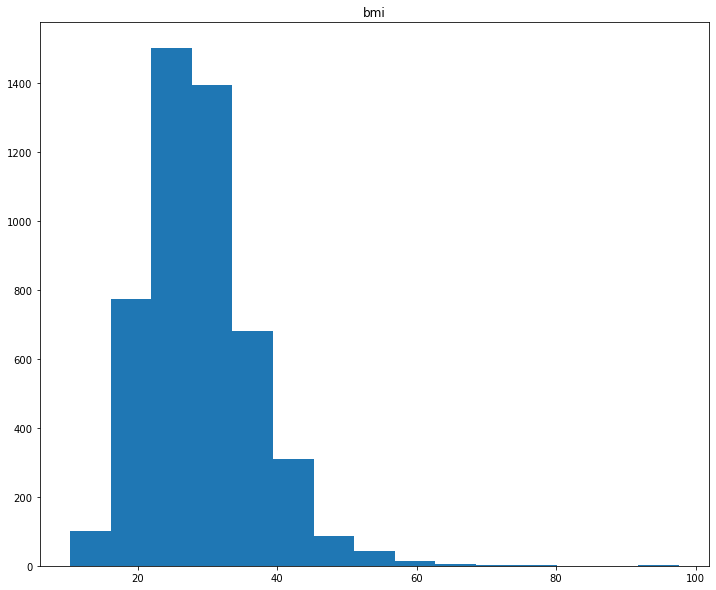

In [44]:
histogram(df, col_list=col_list, n_bin= 15 )

#### Wnioski z powyższych wykresów:

Rozkłady na oko nie są normalne.
* Rozkład wieku jest bardzo zrównoważony
* Poziom glukozy wyodrębnia grupę cukrzyków
* Rozkład bmi jest najbardziej zbliżony do rozkładu normalnego, lecz posiada długi ogon, wyodrębniając ludzi otyłych

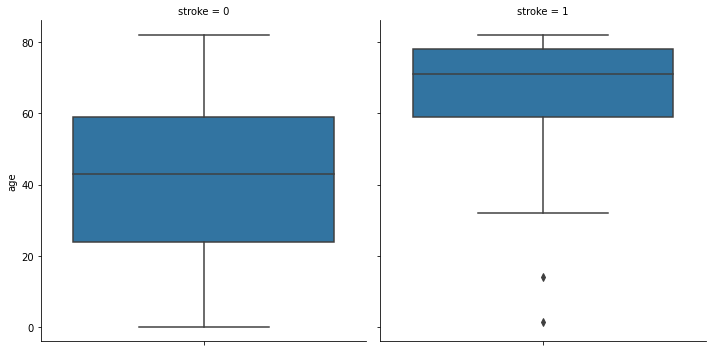

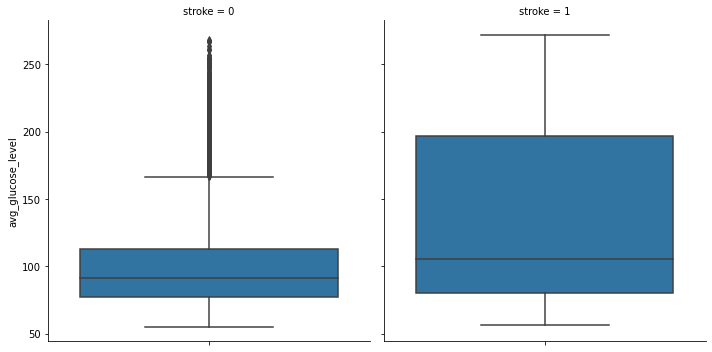

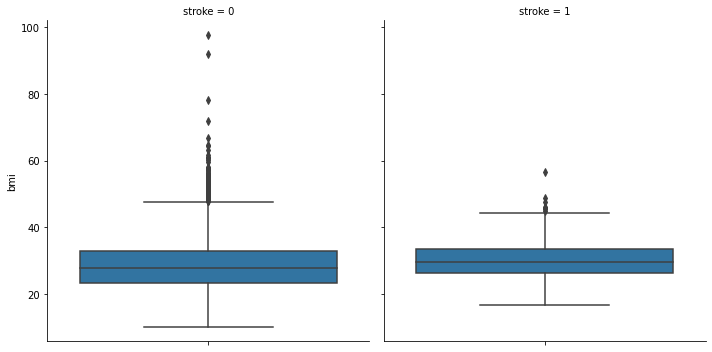

In [45]:
for var in col_list:
    sns.catplot(data=df, y=var, col = 'stroke', kind='box');

#### Wnioski z powyższych wykresów:

* Ryzyko udaru dla osób starszych jest większe, co jest naturalną zależnością
* Udar u cukrzyków jest bardziej prawdopodobny (co chyba też jest dość naturalną zależnością)
* bmi do sprawdzenia, czy będzie dobrym klasyfikatorem - **zamiana na kategorie**

### Kopia pliku

In [46]:
df_checkpoint_1 = df.copy()

In [47]:
df_checkpoint_1.groupby(['stroke','smoking_status'])['gender'].count().reset_index()
#zostawiamy tę zmienną

,stroke,smoking_status,gender
0,0,Unknown,1497
1,0,formerly smoked,815
2,0,never smoked,1802
3,0,smokes,747
4,1,Unknown,47
5,1,formerly smoked,70
6,1,never smoked,90
7,1,smokes,42


### One Hot Encoding

In [48]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'])

In [49]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_cat,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,60 or greater,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,45 - 59,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,60 or greater,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,45 - 59,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,60 or greater,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [50]:
### Korelacje

In [51]:
df.corr(method='spearman')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.280647,0.269627,0.145168,0.375650,0.249531,0.019598,-0.019268,-0.011676,-0.664408,...,-0.078914,0.089099,0.328754,-0.589511,-0.014158,0.014158,-0.353916,0.236744,0.104208,0.062572
hypertension,0.280647,1.000000,0.108306,0.114041,0.167493,0.127904,-0.021143,0.021275,-0.004597,-0.164243,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.269627,0.108306,1.000000,0.106360,0.066144,0.134914,-0.085617,0.085717,-0.003343,-0.114644,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.145168,0.114041,0.106360,1.000000,0.114370,0.082541,-0.049113,0.048641,0.016744,-0.098379,...,-0.008346,0.013114,0.030928,-0.053113,0.013411,-0.013411,-0.053263,0.034725,0.012447,0.014688
bmi,0.375650,0.167493,0.066144,0.114370,1.000000,0.055445,-0.000070,0.000504,-0.014953,-0.385833,...,-0.033397,0.213132,0.092733,-0.487774,-0.001139,0.001139,-0.298561,0.126545,0.112577,0.097796
stroke,0.249531,0.127904,0.134914,0.082541,0.055445,1.000000,-0.009027,0.009117,-0.003166,-0.108340,...,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458,-0.055892,0.064556,-0.004129,0.008939
gender_Female,0.019598,-0.021143,-0.085617,-0.049113,-0.000070,-0.009027,1.000000,-0.999597,-0.016642,-0.030483,...,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306
gender_Male,-0.019268,0.021275,0.085717,0.048641,0.000504,0.009117,-0.999597,1.000000,-0.011757,0.029936,...,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937,0.059658,0.042738,-0.098813,0.011477
gender_Other,-0.011676,-0.004597,-0.003343,0.016744,-0.014953,-0.003166,-0.016642,-0.011757,1.000000,0.019327,...,-0.000920,0.012092,-0.006112,-0.005514,0.014217,-0.014217,-0.009206,0.030568,-0.010728,-0.005978
ever_married_No,-0.664408,-0.164243,-0.114644,-0.098379,-0.385833,-0.108340,-0.030483,0.029936,0.019327,1.000000,...,0.090838,-0.153830,-0.192716,0.544441,0.006261,-0.006261,0.332081,-0.171256,-0.102845,-0.105226


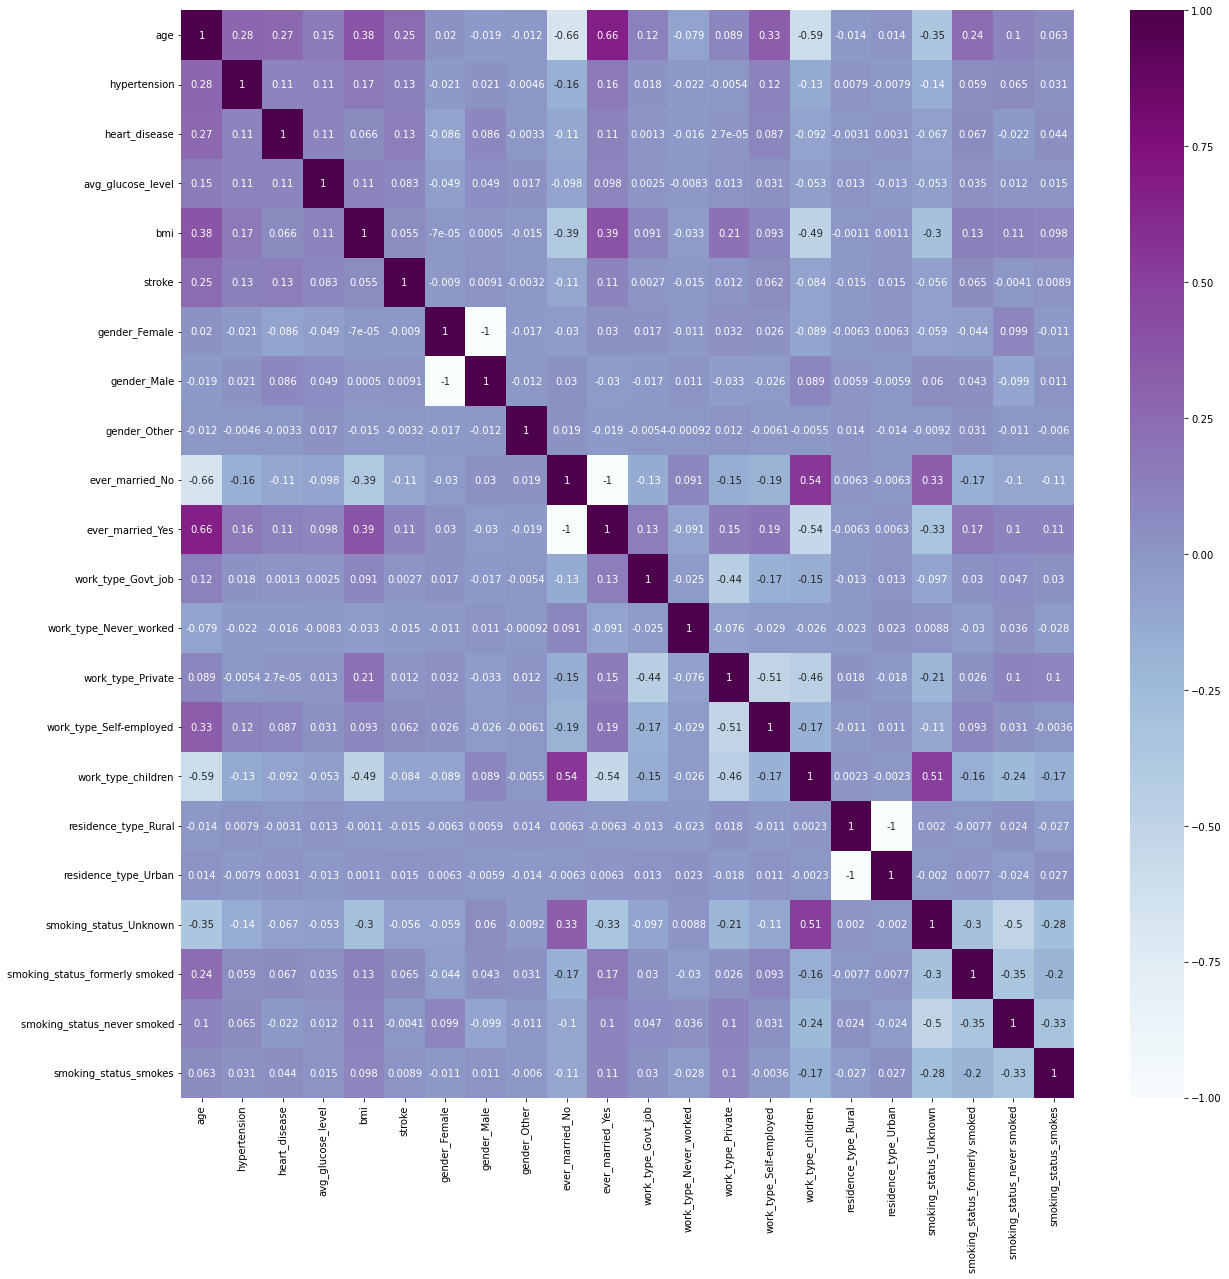

In [52]:
# Heatmapa dla korelacji
plt.figure(figsize = (20,20)) #rozmiar wykresu
sns.color_palette("viridis", as_cmap=True) #paleta kolorów, parametr as_cmap skaluje liczby na kolor (RGB)
Var_Corr = df.corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="BuPu");

#### Usunięcie NaN w bmi

In [53]:
df = df.dropna()

In [54]:
df.shape

(4909, 23)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   age_cat                         4909 non-null   object 
 7   gender_Female                   4909 non-null   uint8  
 8   gender_Male                     4909 non-null   uint8  
 9   gender_Other                    4909 non-null   uint8  
 10  ever_married_No                 4909 non-null   uint8  
 11  ever_married_Yes                4909 non-null   uint8  
 12  work_type_Govt_job              49

In [56]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [57]:
df = df.drop('age_cat', axis = 1)

In [58]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'residence_type_Rural',
       'residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [59]:
df2 = df.copy()

In [60]:
df2['bmi'] = np.where(df2['bmi']< 18.5, 1,
                   np.where(df2['bmi']<25, 2,
                   np.where(df2['bmi']<30, 3,
                   np.where(df2['bmi']<35, 4,
                   np.where(df2['bmi']<40, 5,6 )))))

In [61]:
df2.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,5,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,4,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,2,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,3,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


***

***

### Podział na zbiór treningowy, walidacyjny i testowy

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [63]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [170]:
X = df2.drop('stroke', axis = 1)
y = df2['stroke']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

In [172]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3565,40.0,0,0,65.77,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
898,59.0,0,0,81.64,4,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
2707,57.0,0,0,217.40,5,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4198,81.0,0,0,71.18,2,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2746,65.0,0,0,95.88,3,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [173]:
features_name = list(df2.columns)
features_out = ['age_cat']
features_name = [x for x in features_name if x not in features_out]

In [174]:
features_name

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'residence_type_Rural',
 'residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [175]:
X_train.shape

(3927, 21)

In [176]:
X_test.shape

(982, 21)

In [177]:
y_train.shape

(3927,)

In [178]:
y_test.shape

(982,)

In [179]:
y_train.value_counts()

0    3771
1     156
Name: stroke, dtype: int64

In [180]:
y_test.value_counts()

0    929
1     53
Name: stroke, dtype: int64

***

### Standaryzacja danych

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, precision_recall_curve
# from sklearn.model_selection import GridSearchCV

In [80]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***

### Modele

## Drzewo decyzyjne

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from collections import Counter

In [183]:
# Sprawdzenie pojedynczego drzewa (jeden zestaw parametrów)

In [184]:
drzewo = DecisionTreeClassifier(criterion= 'entropy', class_weight= {0: 1, 1: 10}, max_depth= 4, max_features= 9, random_state = 42)
drzewo.fit(X_train, y_train)
y_pred = drzewo.predict(X_test)

In [185]:
f1 = f1_score(y_test, y_pred)

In [186]:
f1

0.16058394160583941

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       929
           1       0.13      0.21      0.16        53

    accuracy                           0.88       982
   macro avg       0.54      0.56      0.55       982
weighted avg       0.91      0.88      0.90       982



In [188]:
# PRÓBA GRID SEARCH

In [189]:
param_drzewo = {"max_depth": [3,4],
              "max_features": list(range(3,4)),
                "class_weight": [{0: 1, 1: 1}]
             }


In [190]:
rf_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid=param_drzewo, cv=5, scoring = ['f1','recall'], refit = 'f1', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 1}], 'max_depth': [3, 4],
                         'max_features': [3]},
             refit='f1', scoring=['f1', 'recall'])

In [191]:
grid_search.cv_results_
#splitx_test_score pokazuje teraz recall, który wynosi 0, bo algorytm wrzuca wszystko do jednego

{'mean_fit_time': array([0.0030005 , 0.00319982]),
 'std_fit_time': array([0.00063241, 0.00039935]),
 'mean_score_time': array([0.00260005, 0.00240088]),
 'std_score_time': array([0.00048889, 0.00049027]),
 'param_class_weight': masked_array(data=[{0: 1, 1: 1}, {0: 1, 1: 1}],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[3, 3],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3},
  {'class_weight': {0: 1, 1: 1}, 'max_depth': 4, 'max_features': 3}],
 'split0_test_f1': array([0., 0.]),
 'split1_test_f1': array([0., 0.]),
 'split2_test_f1': array([0., 0.]),
 'split3_test_f1': array([0., 0.]),
 'split4_test_f1': array([0., 0.]),
 'mean_test_f1': array([0., 0.]),
 'st

In [192]:
grid_search.best_score_ 

0.0

In [193]:
grid_search.scorer_ 

{'f1': make_scorer(f1_score, average=binary),
 'recall': make_scorer(recall_score, average=binary)}

In [194]:
#sprawdzenie accuracy

In [195]:
grid_search = GridSearchCV(rf_classifier, param_grid=param_drzewo, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

grid_search.cv_results_
#splitx_test_score pokazuje teraz recall, który wynosi 0, bo algorytm wrzuca wszystko do jednego

{'mean_fit_time': array([0.00319939, 0.00320044]),
 'std_fit_time': array([0.00039933, 0.00040035]),
 'mean_score_time': array([0.00140009, 0.00119958]),
 'std_score_time': array([0.00048961, 0.0004005 ]),
 'param_class_weight': masked_array(data=[{0: 1, 1: 1}, {0: 1, 1: 1}],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[3, 3],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3},
  {'class_weight': {0: 1, 1: 1}, 'max_depth': 4, 'max_features': 3}],
 'split0_test_score': array([0.9605598, 0.9605598]),
 'split1_test_score': array([0.95928753, 0.95928753]),
 'split2_test_score': array([0.96050955, 0.96050955]),
 'split3_test_score': array([0.96050955, 0.96050955]),


In [196]:
print(grid_search.best_index_ )

0


In [197]:
grid_search.best_score_ #wybiera średnią z walidacji krzyżowej ze wszystkich kombinacji parametrów - w tym przykładzie
# oba algorytmy wrzucają wszystko do jedynek i mają tę samą wartość, więc wskazało pierwszy model

0.9602751981329314

In [198]:
grid_search.best_params_

{'class_weight': {0: 1, 1: 1}, 'max_depth': 3, 'max_features': 3}

In [199]:
# KONIEC PRÓBA GRID SEARCH

In [200]:
 GridSearchCV?

In [ ]:
drzewo = DecisionTreeClassifier(random_state = 42)

In [201]:
param_drzewo = {"max_depth": [3, 4, 5, 6, 7],
                "criterion": ['entropy', 'gini'],
              "max_features": list(range(3,10)),
                "class_weight": [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 2, 1: 5}, {0: 1, 1: 10},{0: 1, 1: 15}, {0: 2, 1: 15}]
             }

In [ ]:
param_drzewo_samp = {"max_depth": [3, 4, 5],
                    "criterion": ['entropy', 'gini'],
                    "max_features": list(range(3,7)),
                     }

In [79]:
ros = RandomOverSampler(random_state=42)
X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)

In [75]:
max_depth = [3, 4, 5]
criterion = ['entropy', 'gini']
max_features = [3, 4, 5,]

In [80]:
for depth in max_depth:
    for crit in criterion:
        for max_feat in max_features:
            drzewo = DecisionTreeClassifier(max_depth=depth, criterion=crit, max_features=max_feat ,random_state = 42)
            drzewo.fit(X_train_scaled_ros, y_train_ros)
            y_pred = drzewo.predict(X_test_scaled)
            print(f"Paramtery modelu: max_depth: {depth}, criterion: {crit}, max_features: {max_feat}")
            print(classification_report(y_test, y_pred))
            print(confusion_matrix(y_test, y_pred))
            print()

Paramtery modelu: max_depth: 3, criterion: entropy, max_features: 3
              precision    recall  f1-score   support

           0       0.97      0.38      0.55       929
           1       0.07      0.77      0.12        53

    accuracy                           0.40       982
   macro avg       0.52      0.58      0.33       982
weighted avg       0.92      0.40      0.52       982

[[354 575]
 [ 12  41]]

Paramtery modelu: max_depth: 3, criterion: entropy, max_features: 4
              precision    recall  f1-score   support

           0       0.99      0.41      0.58       929
           1       0.08      0.92      0.15        53

    accuracy                           0.43       982
   macro avg       0.54      0.67      0.36       982
weighted avg       0.94      0.43      0.55       982

[[377 552]
 [  4  49]]

Paramtery modelu: max_depth: 3, criterion: entropy, max_features: 5
              precision    recall  f1-score   support

           0       0.99      0.35      

In [81]:
#grid search definition
def grid_search(classifier, param_grid, scoring, refit = 'f1', cross_val = 0):
    if cross_val == 0:
        return GridSearchCV(classifier, param_grid=param_grid, scoring = scoring, refit = refit, verbose=0)
    if cross_val == 1:
        return GridSearchCV(classifier, param_grid=param_grid, scoring = scoring, refit = refit, verbose=0)
    if cross_val >= 2:
        return GridSearchCV(classifier, param_grid=param_grid, scoring = scoring, refit = refit, verbose=0, cv = cross_val)

# grid_search.fit(X, y)

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\envs\projekt_python\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: recall 
 Najlepsza wartość metryki: 0.808467741935484 
 Pozostałe score'y: {'f1': 0.16397065706257696, 'recall': 0.808467741935484, 'precision': 0.09137882733342384, 'accuracy': 0.6707281891703538, 'roc_auc': 0.7823611572503438} 
 
 Najlepsze parametry: {'class_weight': {0: 1, 1: 15}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8} 
 Macierz kontyngencji:
[[2602 1169]
 [  27  129]]
Macierz na zbiorze testowym:
[[636 293]
 [  9  44]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      3771
           1       0.10      0.83      0.18       156

    accuracy                           0.70      3927
   macro avg       0.54      0.76      0.50      3927
weighted avg       0.95      0.70      0.79      3927

              precision    recall  f1-score   support

  

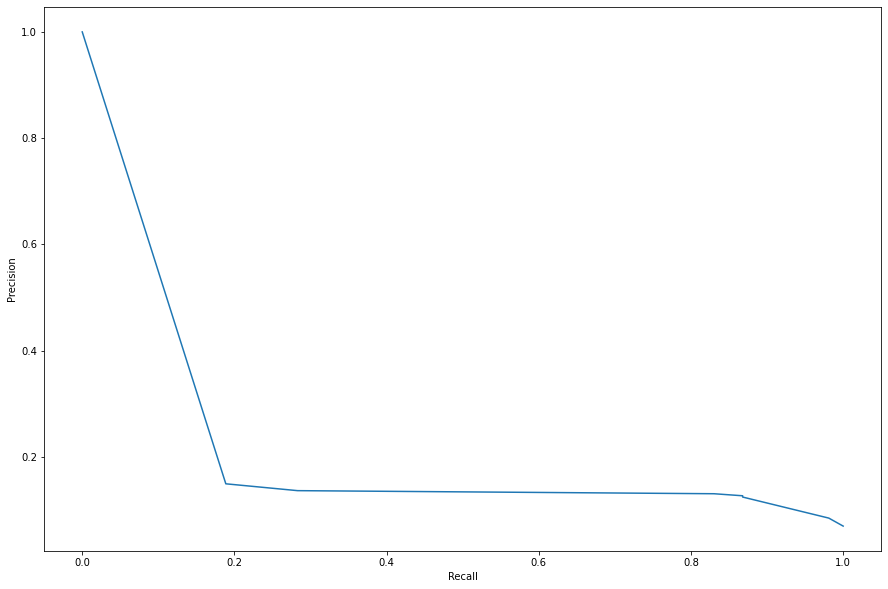

In [204]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'recall'
cross_val = [5]

for cv_value in cross_val:

    # grid search
    grid_search_clf = grid_search(drzewo, param_drzewo, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled, y_train) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled)
    y_pred_proba = best_est.predict_proba(X_train_scaled)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]

    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)


    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
\n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(recall_c, precision_c)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    print(classification_report(y_train, y_pred))
    print(classification_report(y_test, y_pred_test))

In [82]:
#Grid search z oversamplingiem

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score


Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.8042115401016042 
 Pozostałe score'y: {'f1': 0.8042115401016042, 'recall': 0.898942505313823, 'precision': 0.7323308708106838, 'accuracy': 0.7818866641002791, 'roc_auc': 0.8649709672851531} 
 Najlepsze parametry: {'criterion': 'gini', 'max_depth': 6, 'max_features': 6} 
 Macierz kontyngencji:
[[2817  954]
 [ 483 3288]]
Macierz na zbiorze testowym:
[[681 248]
 [ 22  31]]
F1 score dla zbioru testowego:  0.18674698795180725
ROC AUC score dla zbioru testowego:  0.6948229989641935
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3771
           1       0.78      0.87      0.82      3771

    accuracy                           0.81      7542
   macro avg       0.81      0.81      0.81      7542
weighted avg       0.81      0.81      0.

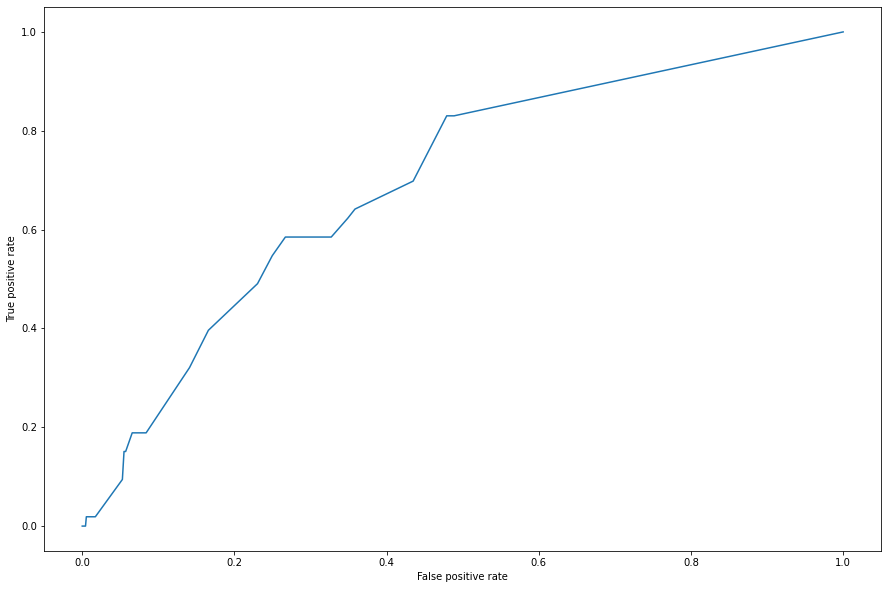

In [79]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(drzewo, param_drzewo_samp, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#    plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 156), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7579282582841687 
 Pozostałe score'y: {'f1': 0.7579282582841687, 'recall': 0.8209677419354839, 'precision': 0.7141289397584506, 'accuracy': 0.7340501792114694, 'roc_auc': 0.7924980489073882} 
 Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 8} 
 Macierz kontyngencji:
[[734 195]
 [ 19  34]]
Macierz dla testowego:
[[128  28]
 [ 48 108]]
F1 score dla zbioru testowego:  0.24113475177304966
ROC AUC score dla zbioru testowego:  0.7855169892560473
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       156
           1       0.79      0.69      0.74       156

    accuracy                           0.76       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.76      0.76      0.76      

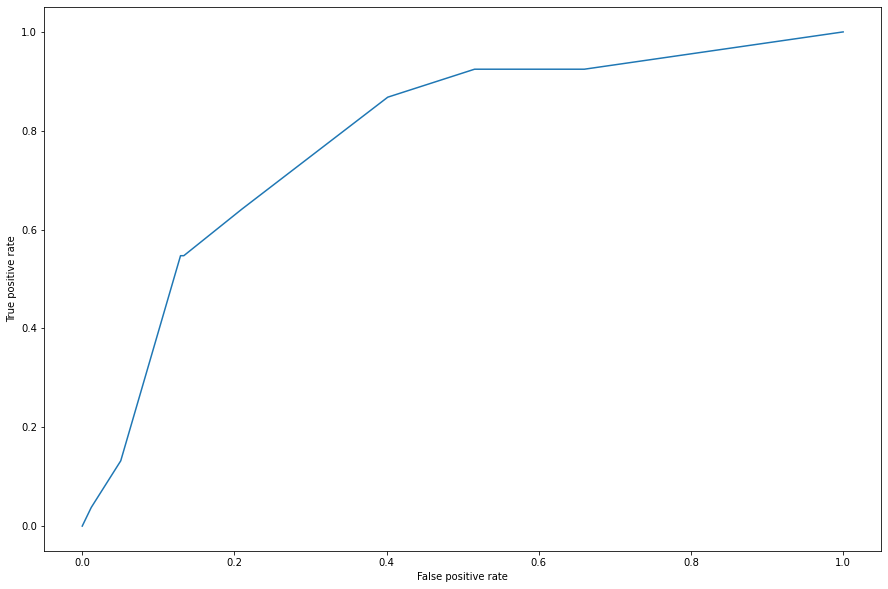

In [207]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(drzewo, param_drzewo_samp, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.8490131976475647 
 Pozostałe score'y: {'f1': 0.8490131976475647, 'recall': 0.9135517417042879, 'precision': 0.7938305079394145, 'accuracy': 0.8371799266294364, 'roc_auc': 0.9027536788121638} 
 Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 8} 
 Macierz kontyngencji:
[[2900  871]
 [ 328 3443]]
Macierz na zbiorze testowyn:
[[687 242]
 [ 21  32]]
F1 score dla zbioru testowego:  0.19571865443425077
ROC AUC score dla zbioru testowego:  0.7523204094481792
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3771
           1       0.80      0.91      0.85      3771

    accuracy                           0.84      7542
   macro avg       0.85      0.84      0.84      7542
weighted avg       0.85      0.84    

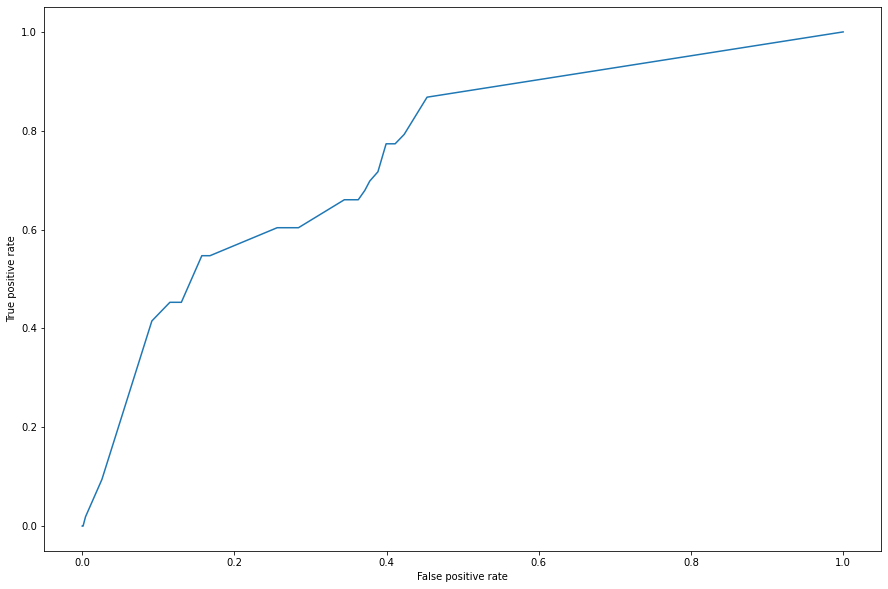

In [208]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(drzewo, param_drzewo_samp, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

## Lasy

In [83]:
las =RandomForestClassifier(random_state=42)

In [80]:
param_las = {"max_depth": [3, 4, 5],
                "criterion": ['entropy', 'gini'],
              "max_features": list(range(3,6)),
                'n_estimators': [50, 100]
             }

In [129]:
param_las = {"max_depth": [3, 4, 5],
                "criterion": ['entropy', 'gini'],
              "max_features": list(range(3,6)),
                'n_estimators': [50],
             'min_impurity_decrease' : [0.22]
             }             

In [86]:
max_depth = [3]
criterion = ['entropy']
max_features = [3]
n_estimators = [30]
min_impurity_decrease = [0.01]
min_samples_split = [100]
min_samples_leaf = [50]

### dla df2 'bmi'

In [84]:
ros = RandomOverSampler(random_state=42)
X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)

Paramtery modelu: max_depth: 3, criterion: entropy, max_features: 3, n_estimators: 30, min_impurity_decrease: 0.01, min_samples_split: 100, min_samples_leaf: 50
              precision    recall  f1-score   support

           0       0.99      0.47      0.64       929
           1       0.09      0.91      0.16        53

    accuracy                           0.50       982
   macro avg       0.54      0.69      0.40       982
weighted avg       0.94      0.50      0.61       982

[[439 490]
 [  5  48]]
ROC score:  0.6891057538030343



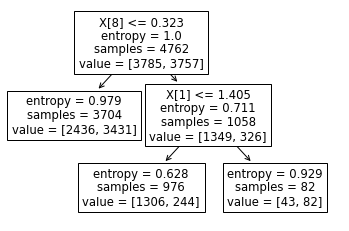

In [89]:
for depth in max_depth:
    for crit in criterion:
        for max_feat in max_features:
            for estim in n_estimators:
                for impurity in min_impurity_decrease:
                    for split in min_samples_split:
                        for leaf in min_samples_leaf:
                            las = RandomForestClassifier(max_depth=depth, criterion=crit, max_features=max_feat, 
                                                        n_estimators=estim, min_impurity_decrease=impurity,
                                                         min_samples_split=split, min_samples_leaf=leaf, random_state = 42)
                            las.fit(X_train_scaled_ros, y_train_ros)
                            y_pred = las.predict(X_test_scaled)
                            print(f"Paramtery modelu: max_depth: {depth}, criterion: {crit}, max_features: {max_feat}, n_estimators: {estim}, min_impurity_decrease: {impurity}, min_samples_split: {split}, min_samples_leaf: {leaf}")
                            print(classification_report(y_test, y_pred))
                            print(confusion_matrix(y_test, y_pred))
                            print("ROC score: ", roc_auc_score(y_test, y_pred))
                            estimator = las.estimators_[2]
                            plot_tree(estimator)
                            print()

In [126]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'residence_type_Rural', 'residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [140]:
X_train_scaled.shape

(3927, 21)

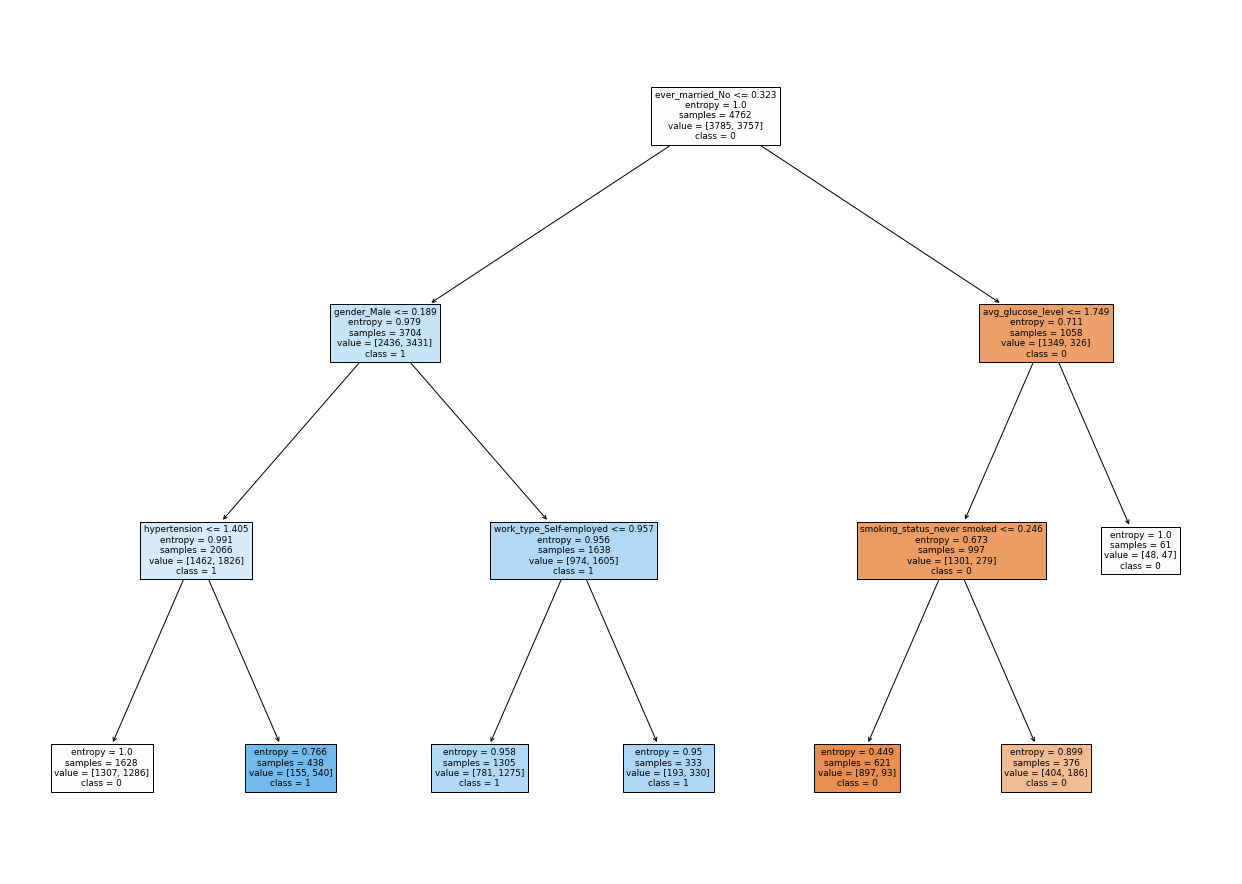

In [134]:
estimator = las.estimators_[2]
fig, axe = plt.subplots(figsize=(22,16))
_ = plot_tree(estimator, filled=True, class_names=['0', '1'], feature_names=X_train.columns)


In [136]:
from sklearn.metrics import roc_auc_score, f1_score 

AUC_scores = []
f1_scores = []
x = np.arange(0.3, 0.7, 0.05)
for i in x:
    decisions = (y_pred_proba_test >= i).astype(int)
    AUC_scores.append([i, roc_auc_score(y_test, decisions)])
    f1_scores.append([i, f1_score(y_test, decisions)])
    print(confusion_matrix(y_test, decisions), i)

#print(AUC_scores, f1_scores)


[[  0 929]
 [  0  53]] 0.3
[[  0 929]
 [  0  53]] 0.35
[[  0 929]
 [  0  53]] 0.39999999999999997
[[393 536]
 [  2  51]] 0.44999999999999996
[[393 536]
 [  2  51]] 0.49999999999999994
[[929   0]
 [ 53   0]] 0.5499999999999999
[[929   0]
 [ 53   0]] 0.5999999999999999
[[929   0]
 [ 53   0]] 0.6499999999999999


In [211]:
RandomForestClassifier?

C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-e

C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-e

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7858178525360833 
 Pozostałe score'y: {'f1': 0.7858178525360833, 'recall': 0.9663238884887664, 'precision': 0.6625871080952198, 'accuracy': 0.7364072857285993, 'roc_auc': 0.7498258395891542} 
 Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_impurity_decrease': 0.22, 'n_estimators': 50} 
 Macierz kontyngencji:
[[1648 2123]
 [  21 3750]]
Macierz na zbiorze testowym:
[[393 536]
 [  2  51]]
F1 score dla zbioru testowego:  0.15937500000000002
ROC AUC score dla zbioru testowego:  0.7366716087495176
              precision    recall  f1-score   support

           0       0.99      0.44      0.61      3771
           1       0.64      0.99      0.78      3771

    accuracy                           0.72      7542
   macro avg       0.81      0.72      0

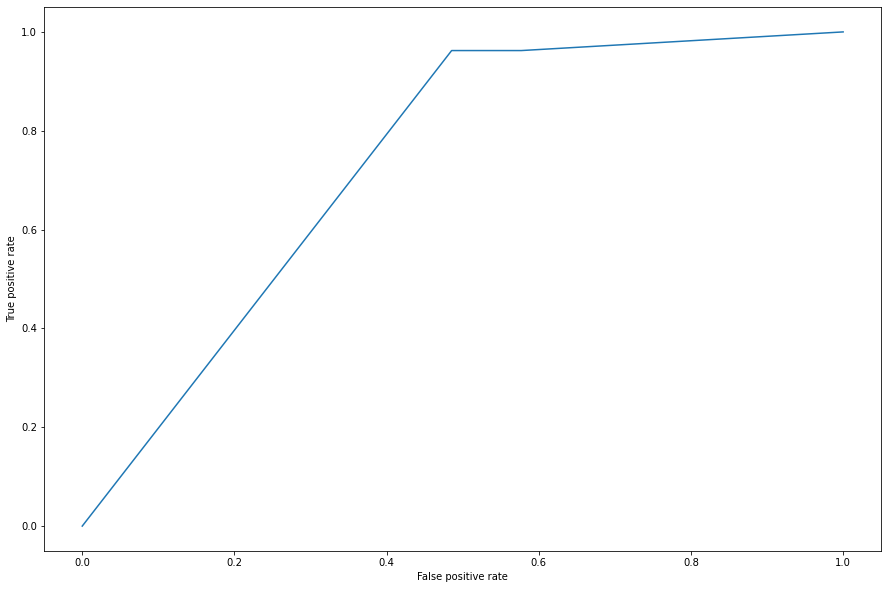

In [130]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(las, param_las, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 156), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7650426210044883 
 Pozostałe score'y: {'f1': 0.7650426210044883, 'recall': 0.802217741935484, 'precision': 0.7386670881407724, 'accuracy': 0.7567332309267792, 'roc_auc': 0.8382609261186265} 
 Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 9, 'n_estimators': 100} 
 Macierz kontyngencji:
[[633 296]
 [  7  46]]
Macierz dla testowego:
[[151   5]
 [  2 154]]
F1 score dla zbioru testowego:  0.23291139240506326
ROC AUC score dla zbioru testowego:  0.8185713995572437
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.97      0.99      0.98       156

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      

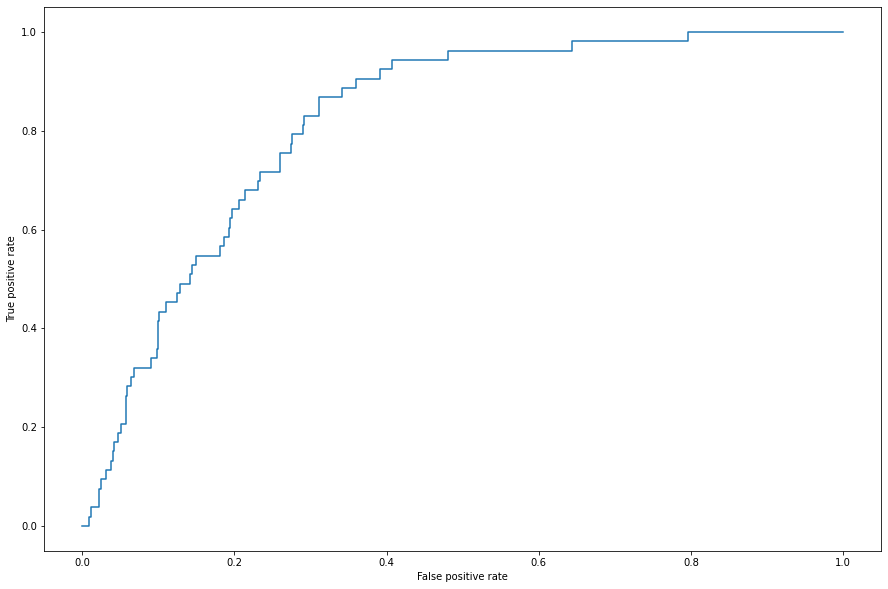

In [213]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(las, param_las, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.8880791373586667 
 Pozostałe score'y: {'f1': 0.8880791373586667, 'recall': 0.9461664939308237, 'precision': 0.8368178021239272, 'accuracy': 0.8808006953855998, 'roc_auc': 0.9620459538226607} 
 Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'n_estimators': 50} 
 Macierz kontyngencji:
[[3166  605]
 [ 148 3623]]
Macierz na zbiorze testowyn:
[[774 155]
 [ 28  25]]
F1 score dla zbioru testowego:  0.21459227467811157
ROC AUC score dla zbioru testowego:  0.7878830960456569
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      3771
           1       0.86      0.96      0.91      3771

    accuracy                           0.90      7542
   macro avg       0.91      0.90      0.90      7542
weighted avg     

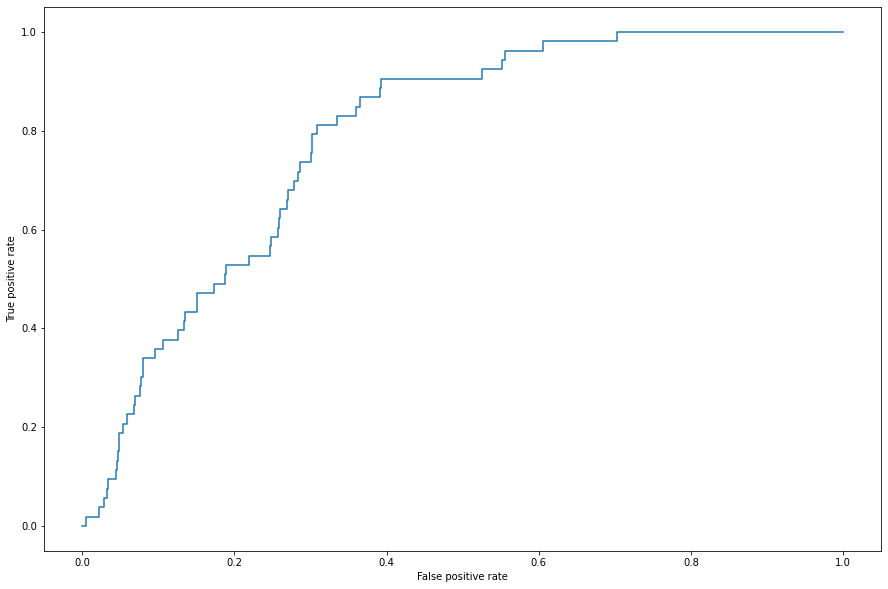

In [83]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(las, param_las, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)


    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

# xgboost

In [159]:
from time import time
import scikitplot as skplt

In [84]:
param_xgb = {"max_depth": [3, 4, 5, 6],
                'n_estimators': [50, 100],
             'booster': ['gbtree', 'gblinear', 'dart'],
                 'learning_rate': [0.3, 0.5, 0.8, 1, 1.2],
             'min_impurity_decrease' : []
             }

In [118]:
param_xgb = {"max_depth": [4],
                'n_estimators': [50],
             'booster': ['gbtree'],
                 'learning_rate': [0.05],
             'min_impurity_decrease' : [0.3]
             }

In [160]:
def plot_feature_importances(model, feat_list):
    model_name = type(model).__name__
    skplt.estimators.plot_feature_importances(model, feature_names=df[feat_list].columns,
                                            title=f'{model_name} feature importances')
    plt.xticks(rotation=90)

In [116]:
?XGBoost

Object `XGBoost` not found.


In [182]:
ros = RandomOverSampler(random_state=42)
X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)

In [183]:
X_train_scaled_ros.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [184]:
max_depth = [5]
criterion = ['entropy']
booster = ['gbtree']
max_features = [3]
n_estimators = [50] 
min_impurity_decrease = [0.3]
min_samples_split = [100]
min_samples_leaf = [50]
learning_rate = [0.05]
min_child_weight = [20]

[19:25:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Paramtery modelu: max_depth: 5, booster: gbtree, learning_rate: 0.05 criterion: entropy, max_features: 3, n_estimators: 50, min_impurity_decrease: 0.3, min_samples_split: 100, min_samples_leaf: 50, min_child_weigh: 20
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       929
           1       0.17      0.75      0.28        53

    accuracy                           0.79       982
   macro avg       0.58      0.77      0.58       982
weighted a

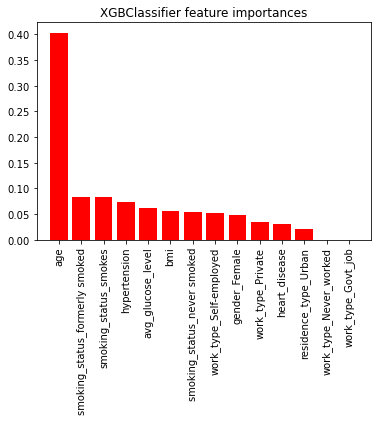

In [186]:
for depth in max_depth:
    for crit in criterion:
        for max_feat in max_features:
            for estim in n_estimators:
                for impurity in min_impurity_decrease:
                    for split in min_samples_split:
                        for leaf in min_samples_leaf:
                            for boost in booster:
                                for rate in learning_rate:
                                    for child in min_child_weight:
                                        xgb_cl = xgb.XGBClassifier(eval_metric='aucpr',max_depth=depth, criterion=crit, max_features=max_feat, 
                                                                    n_estimators=estim, min_impurity_decrease=impurity, min_child_weight=child,
                                                                     min_samples_split=split, min_samples_leaf=leaf,
                                                                   learning_rate=rate, booster=boost, random_state = 42)
                                        start = time()
                                        xgb_cl.fit(X_train_scaled_ros, y_train_ros)
                                        y_pred = xgb_cl.predict(X_test_scaled)
                                        end = time()
                                        training_time = end - start
                                        print(f"Paramtery modelu: max_depth: {depth}, booster: {boost}, learning_rate: {rate} criterion: {crit}, max_features: {max_feat}, n_estimators: {estim}, min_impurity_decrease: {impurity}, min_samples_split: {split}, min_samples_leaf: {leaf}, min_child_weigh: {child}")
                                        print(classification_report(y_test, y_pred))
                                        print(confusion_matrix(y_test, y_pred))
                                        print("ROC score: ", roc_auc_score(y_test, y_pred))
                                        print(f'training_time:{training_time}')
                                        print()
                                        plot_feature_importances(xgb_cl, X_train_scaled_ros.columns)

In [95]:
smt = SMOTE(random_state=42)
X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)

In [96]:
xgb_cl = xgb.XGBClassifier(eval_metric='aucpr',max_depth=3, criterion='entropy', max_features=3, 
                            n_estimators=50, min_impurity_decrease=0.3, min_child_weight=20,
                             min_samples_split=100, min_samples_leaf=50,
                           learning_rate=0.05, booster='gbtree', random_state = 42)
xgb_cl.fit(X_train_scaled_smt, y_train_smt)
y_pred = xgb_cl.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC score: ", roc_auc_score(y_test, y_pred))

[17:45:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.98      0.73      0.84       929
           1       0.14      0.75      0.23        53

    accuracy                           0.73       982
   macro avg       0.56      0.74      0.54       982
weighted avg       0.94      0.73      0.81       982

[[681 248]
 [ 13  40]]
ROC score:  0.743881633730731


In [85]:
xgb_cl = xgb.XGBClassifier(eval_metric='aucpr', random_state=42)

In [147]:
xgb.set_config(verbosity=0)

In [ ]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'recall'
cross_val = [5]

for cv_value in cross_val:

    # grid search
    grid_search_clf = grid_search(xgb_cl, param_xgb, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled, y_train) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled)
    y_pred_proba = best_est.predict_proba(X_train_scaled)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]

    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)


    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
\n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(recall_c, precision_c)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    print(classification_report(y_train, y_pred))
    print(classification_report(y_test, y_pred_test))

[20:28:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" 

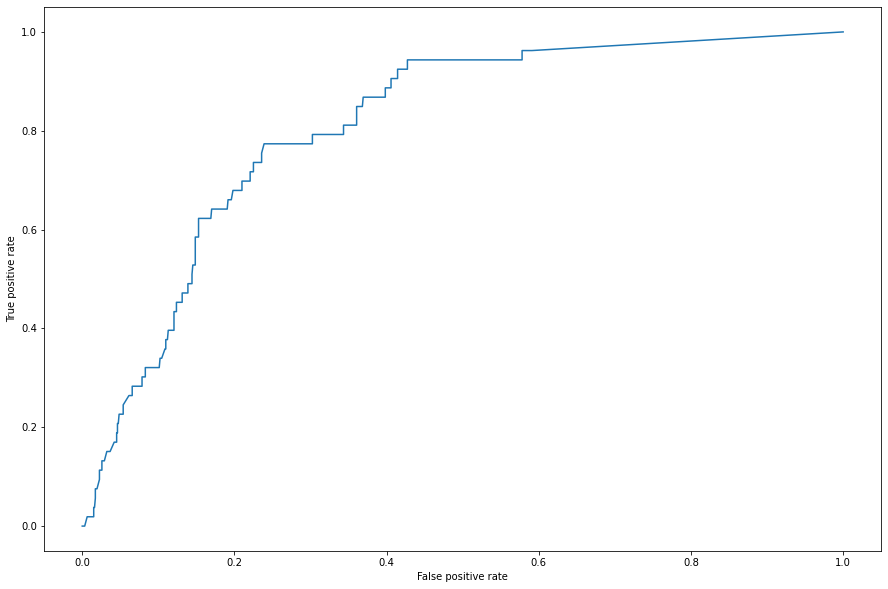

In [119]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(xgb_cl, param_xgb, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

[20:29:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" 

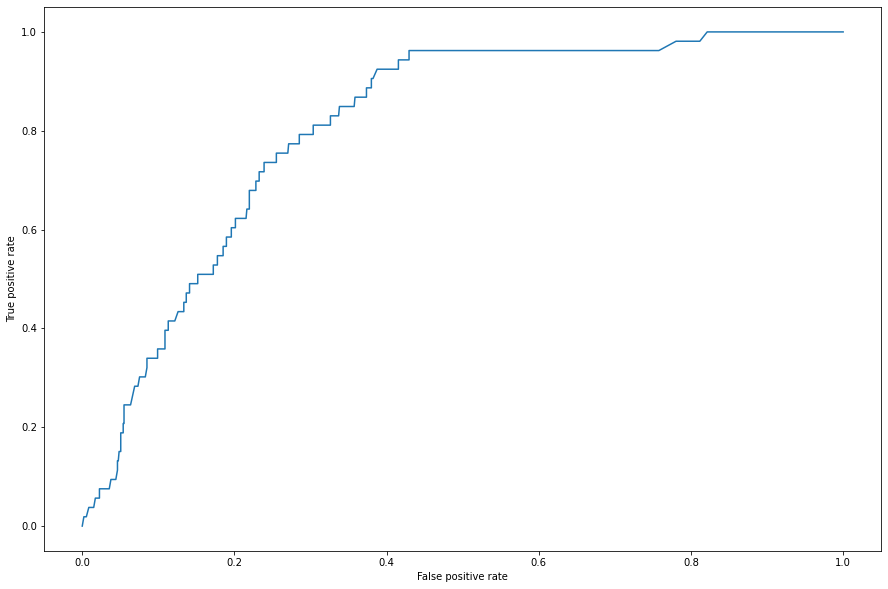

In [120]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(xgb_cl, param_xgb, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))    
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

[20:29:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:29:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_impurity_decrease" 

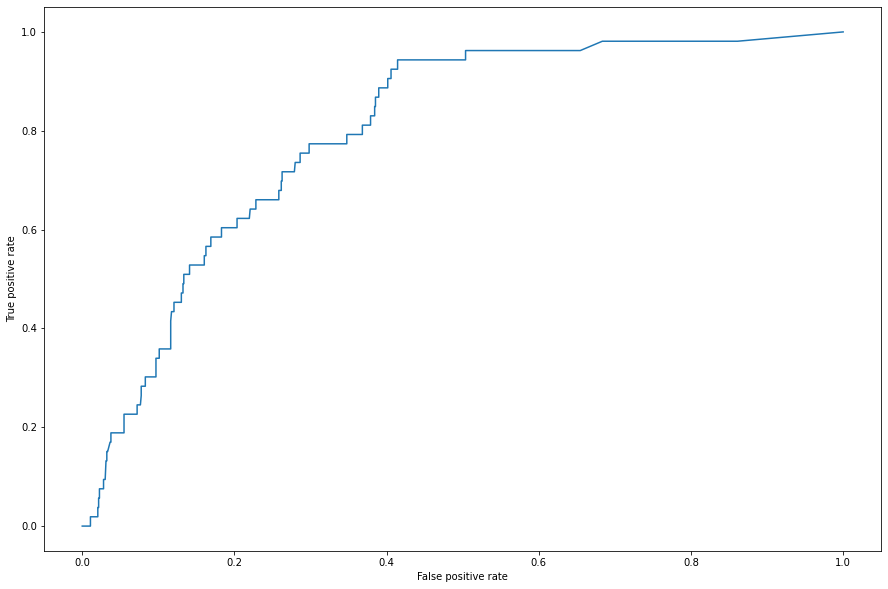

In [121]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(xgb_cl, param_xgb, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

# SVM

In [215]:
from sklearn.svm import SVC

In [76]:
param_svm = {"C": [0.1, 0.5, 1, 1.5],
                'kernel': ['rbf','poly'],
                'gamma': ['auto','scale'],
                'degree': [2, 3, 4],
                'probability': [True]
            }

In [234]:
C = [1] 
kernel = ['poly']
gamma = ['auto']
degree = [1]

In [235]:
for c in C:
    for kern in kernel:
        for gamm in gamma:
            for deg in degree:
                svm = SVC(C=c, kernel=kern, gamma=gamm, degree=deg, random_state=42)
                svm.fit(X_train_scaled_ros, y_train_ros)
                y_pred = svm.predict(X_test_scaled)
                print(f"Paramtery modelu: C: {c}, kenrel: {kern}, gamma: {gamm}, degree: {deg}")
                print(classification_report(y_test, y_pred))
                print(confusion_matrix(y_test, y_pred))
                print("ROC score: ", roc_auc_score(y_test, y_pred))
                print()

Paramtery modelu: C: 1, kenrel: poly, gamma: auto, degree: 1
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       929
           1       0.15      0.85      0.26        53

    accuracy                           0.74       982
   macro avg       0.57      0.79      0.55       982
weighted avg       0.94      0.74      0.81       982

[[678 251]
 [  8  45]]
ROC score:  0.7894368056542844



In [236]:
svm = SVC(C=1, kernel='poly', gamma='auto', degree=1, random_state=42)
svm.fit(X_train_scaled_smt, y_train_smt)
y_pred = svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       929
           1       0.14      0.79      0.24        53

    accuracy                           0.73       982
   macro avg       0.56      0.76      0.54       982
weighted avg       0.94      0.73      0.80       982

[[673 256]
 [ 11  42]]
ROC score:  0.7584438531998294


In [77]:
svm = SVC(random_state=42)

In [78]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(svm, param_svm, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

KeyboardInterrupt: 

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 156), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7269772580215557 
 Pozostałe score'y: {'f1': 0.7269772580215557, 'recall': 0.7643145161290322, 'precision': 0.7013392072872797, 'accuracy': 0.7184843830005121, 'roc_auc': 0.7830059833506764} 
 Najlepsze parametry: {'C': 1.5, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} 
 Macierz kontyngencji:
[[629 300]
 [  6  47]]
Macierz dla testowego:
[[123  33]
 [ 14 142]]
F1 score dla zbioru testowego:  0.235
ROC AUC score dla zbioru testowego:  0.8271828096756504
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       156
           1       0.81      0.91      0.86       156

    accuracy                           0.85       312
   macro avg       0.85      0.85      0.85       312
weighted avg       0.85      0.85      0.85 

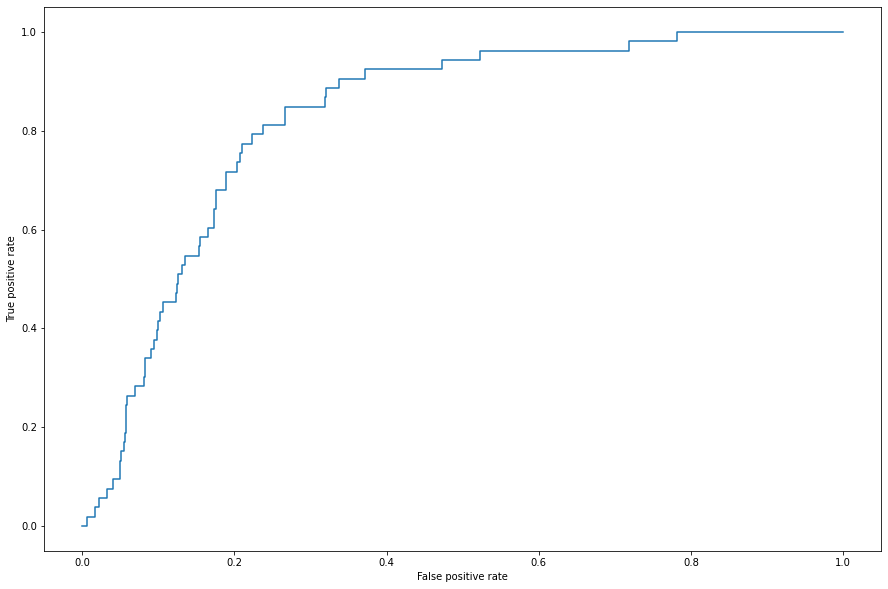

In [227]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(svm, param_svm, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)


    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.9194646960231321 
 Pozostałe score'y: {'f1': 0.9194646960231321, 'recall': 0.957302510232403, 'precision': 0.88477837421788, 'accuracy': 0.9160673448258285, 'roc_auc': 0.9748340209917499} 
 Najlepsze parametry: {'C': 2, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} 
 Macierz kontyngencji:
[[3370  401]
 [ 140 3631]]
Macierz na zbiorze testowyn:
[[827 102]
 [ 32  21]]
F1 score dla zbioru testowego:  0.23863636363636365
ROC AUC score dla zbioru testowego:  0.7315839714036192
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      3771
           1       0.90      0.96      0.93      3771

    accuracy                           0.93      7542
   macro avg       0.93      0.93      0.93      7542
weighted avg       0.93

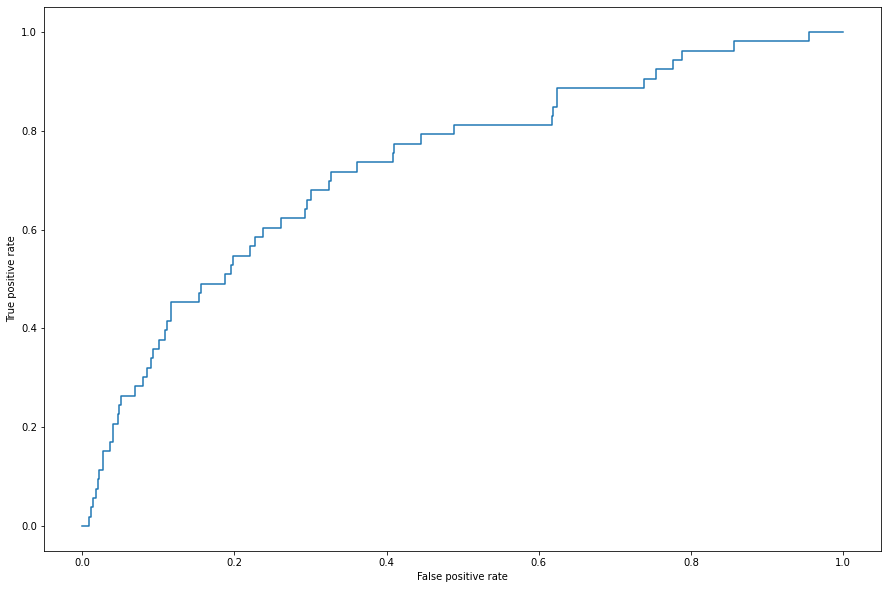

In [228]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(svm, param_svm, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
param_knn = {"n_neighbors": [3, 4, 5],
             'p': [1, 2],
             'weights': ['uniform', 'distance']
             }

In [81]:
knn = KNeighborsClassifier()

In [232]:
#?KNeighborsClassifier

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.9632506447124038 
 Pozostałe score'y: {'f1': 0.9632506447124038, 'recall': 1.0, 'precision': 0.9291639935674777, 'accuracy': 0.9618130298667763, 'roc_auc': 0.9785202100936286} 
 Najlepsze parametry: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'} 
 Macierz kontyngencji:
[[3771    0]
 [   0 3771]]
Macierz na zbiorze testowym:
[[877  52]
 [ 44   9]]
F1 score dla zbioru testowego:  0.15789473684210525
ROC AUC score dla zbioru testowego:  0.576273940329427
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      7542
   macro avg       1.00      1.00      1.00      7542
weighted avg       1.00      1.00      1.00      7542

        

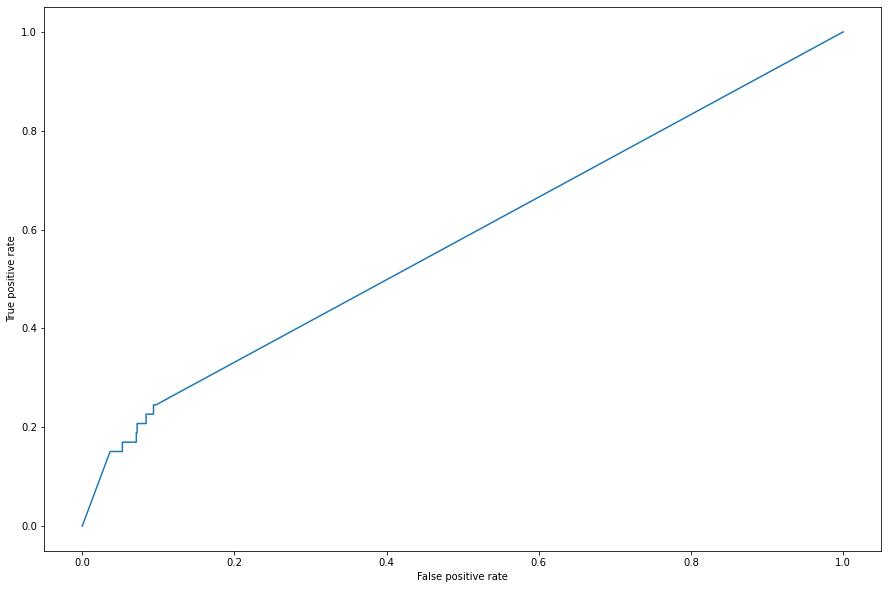

In [84]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(knn, param_knn, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 156), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.6679927457188213 
 Pozostałe score'y: {'f1': 0.6679927457188213, 'recall': 0.6870967741935484, 'precision': 0.6662481716564431, 'accuracy': 0.6637992831541218, 'roc_auc': 0.7131113423517169} 
 Najlepsze parametry: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'} 
 Macierz kontyngencji:
[[616 313]
 [ 14  39]]
Macierz dla testowego:
[[118  38]
 [ 45 111]]
F1 score dla zbioru testowego:  0.1925925925925926
ROC AUC score dla zbioru testowego:  0.7641610983609887
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       156
           1       0.74      0.71      0.73       156

    accuracy                           0.73       312
   macro avg       0.73      0.73      0.73       312
weighted avg       0.73      0.73      0.73       312

      

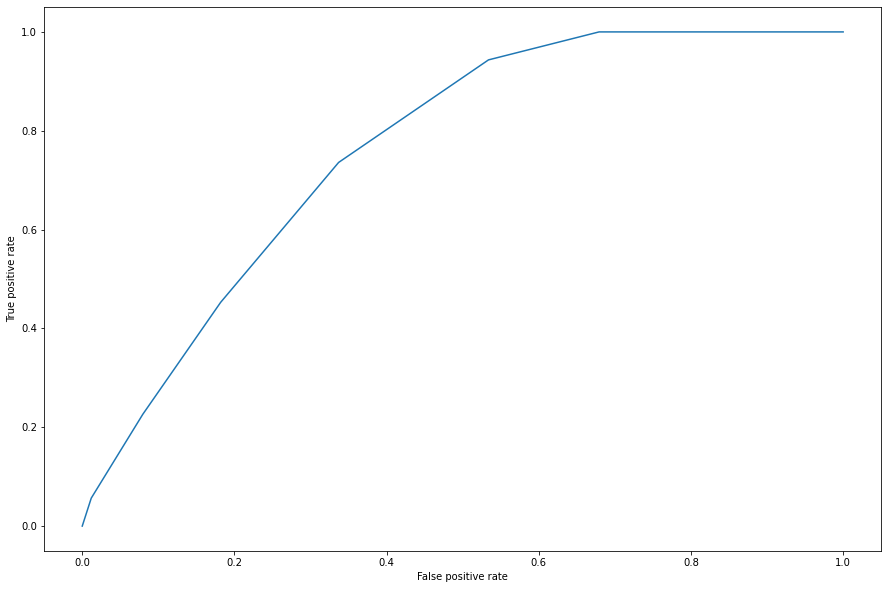

In [234]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(knn, param_knn, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.964846817031809 
 Pozostałe score'y: {'f1': 0.964846817031809, 'recall': 0.9896572803766226, 'precision': 0.94125957619046, 'accuracy': 0.9639347821119262, 'roc_auc': 0.9723799359307902} 
 Najlepsze parametry: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'} 
 Macierz kontyngencji:
[[3771    0]
 [   0 3771]]
Macierz na zbiorze testowyn:
[[882  47]
 [ 43  10]]
F1 score dla zbioru testowego:  0.18181818181818182
ROC AUC score dla zbioru testowego:  0.590521355890895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      7542
   macro avg       1.00      1.00      1.00      7542
weighted avg       1.00      1.00      1.00      754

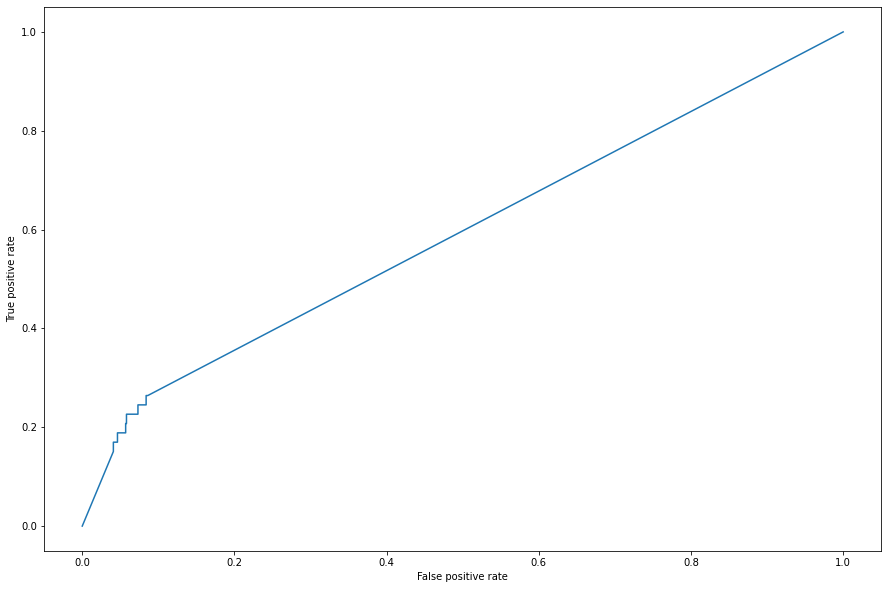

In [235]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(knn, param_knn, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test)) 
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

## Regresja logistyczna

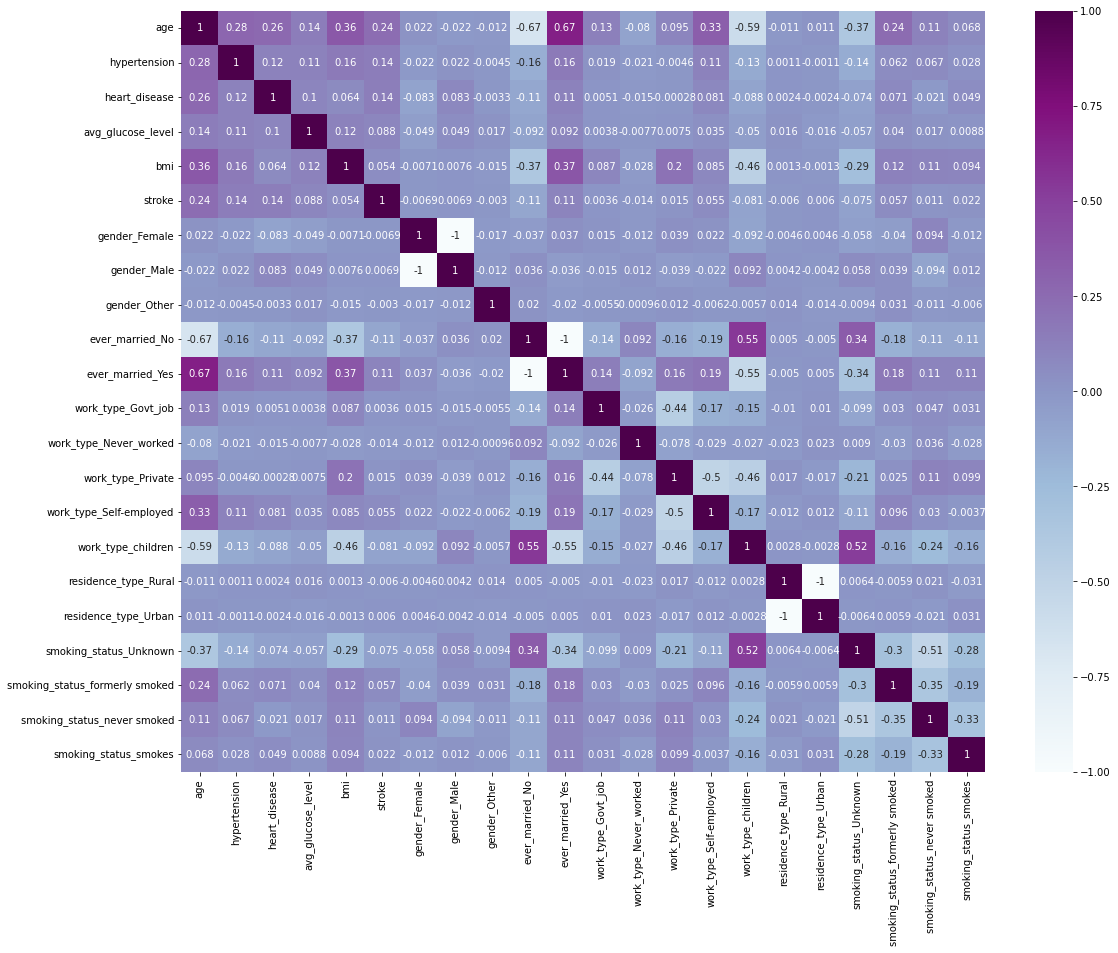

In [97]:
# Heatmapa dla korelacji
plt.figure(figsize = (18,14)) #rozmiar wykresu
sns.color_palette("viridis", as_cmap=True) #paleta kolorów, parametr as_cmap skaluje liczby na kolor (RGB)
Var_Corr = df2.corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="BuPu");

In [98]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [99]:
X_train_scaled.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'residence_type_Rural', 'residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [100]:
X_train_scaled = X_train_scaled.drop(['gender_Male', 'gender_Other', 'residence_type_Rural', 'ever_married_No',
                                      'ever_married_Yes','work_type_children','smoking_status_Unknown'], axis=1)

In [101]:
X_train_scaled.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

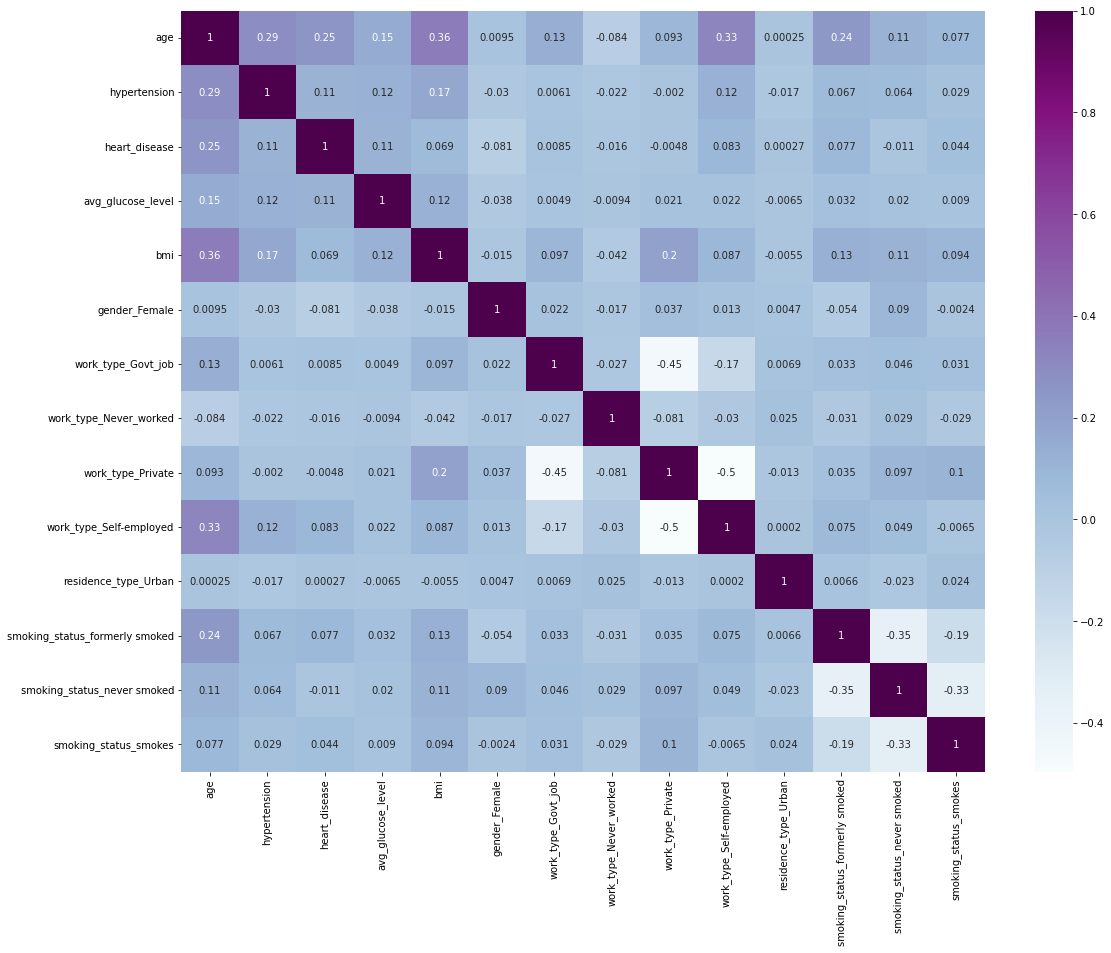

In [102]:
plt.figure(figsize = (18,14)) #rozmiar wykresu
sns.color_palette("viridis", as_cmap=True) #paleta kolorów, parametr as_cmap skaluje liczby na kolor (RGB)
Var_Corr = X_train_scaled.corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="BuPu");

In [103]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [104]:
X_test_scaled.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'residence_type_Rural', 'residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [105]:
X_test_scaled = X_test_scaled.drop(['gender_Male', 'gender_Other', 'residence_type_Rural', 'ever_married_No',
                                      'ever_married_Yes','work_type_children','smoking_status_Unknown'], axis=1)
# ['gender_Male', 'gender_Other', 'residence_type_Rural', 'ever_married_No','work_type_children']

In [106]:
X_test_scaled.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [107]:
ros = RandomOverSampler(random_state=42)
X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)

In [155]:
C = [1] 

In [156]:
for c in C:
    reg_log = LogisticRegression(random_state=42, C=c)
    start = time()
    reg_log.fit(X_train_scaled_ros, y_train_ros)
    y_pred = reg_log.predict(X_test_scaled)
    end = time()
    training_time = end - start
    print(f'Parametry:C={c}, penlaty={pen}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("ROC score: ", roc_auc_score(y_test, y_pred))
    print(f'training_time:{training_time}')

Parametry:C=1, penlaty=l2
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982

[[688 241]
 [  8  45]]
ROC score:  0.7948189369782886
training_time:0.02892279624938965


In [162]:
reg_log.coef_

array([[ 1.80790567,  0.17667686,  0.035808  ,  0.15586094,  0.16688194,
        -0.01764868, -0.38021298, -0.2984911 , -0.5500491 , -0.58550057,
         0.02773518,  0.06078268, -0.01507268,  0.13929785]])

In [169]:
print(f'Regresja logistyczna - features coefficients')
for i, column in enumerate(X_test_scaled.columns):
    print(column, np.round(reg_log.coef_[0][i],3))

Regresja logistyczna - features coefficients:
age 1.808
hypertension 0.177
heart_disease 0.036
avg_glucose_level 0.156
bmi 0.167
gender_Female -0.018
work_type_Govt_job -0.38
work_type_Never_worked -0.298
work_type_Private -0.55
work_type_Self-employed -0.586
residence_type_Urban 0.028
smoking_status_formerly smoked 0.061
smoking_status_never smoked -0.015
smoking_status_smokes 0.139


In [108]:
reg_log = LogisticRegression(random_state=42)
reg_log.fit(X_train_scaled_ros, y_train_ros)
y_pred = reg_log.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982

[[688 241]
 [  8  45]]
ROC score:  0.7948189369782886


In [109]:
smt = SMOTE(random_state=42)
X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)

In [110]:
reg_log = LogisticRegression(random_state=42)
reg_log.fit(X_train_scaled_smt, y_train_smt)
y_pred = reg_log.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       929
           1       0.15      0.79      0.25        53

    accuracy                           0.75       982
   macro avg       0.57      0.77      0.55       982
weighted avg       0.94      0.75      0.82       982

[[692 237]
 [ 11  42]]
ROC score:  0.7686699027154376


In [371]:
reg_log = LogisticRegression(random_state=42)

In [372]:
param_log = {}

C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ela\anaconda3.1\envs\python-project-e

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: recall 
 Najlepsza wartość metryki: 0.0064516129032258064 
 Pozostałe score'y: {'f1': 0.0125, 'recall': 0.0064516129032258064, 'precision': 0.2, 'accuracy': 0.960529975202995, 'roc_auc': 0.8411328253161802} 
 
 Najlepsze parametry: {} 
 Macierz kontyngencji:
[[3771    0]
 [ 155    1]]
Macierz na zbiorze testowym:
[[929   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3771
           1       1.00      0.01      0.01       156

    accuracy                           0.96      3927
   macro avg       0.98      0.50      0.50      3927
weighted avg       0.96      0.96      0.94      3927

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53



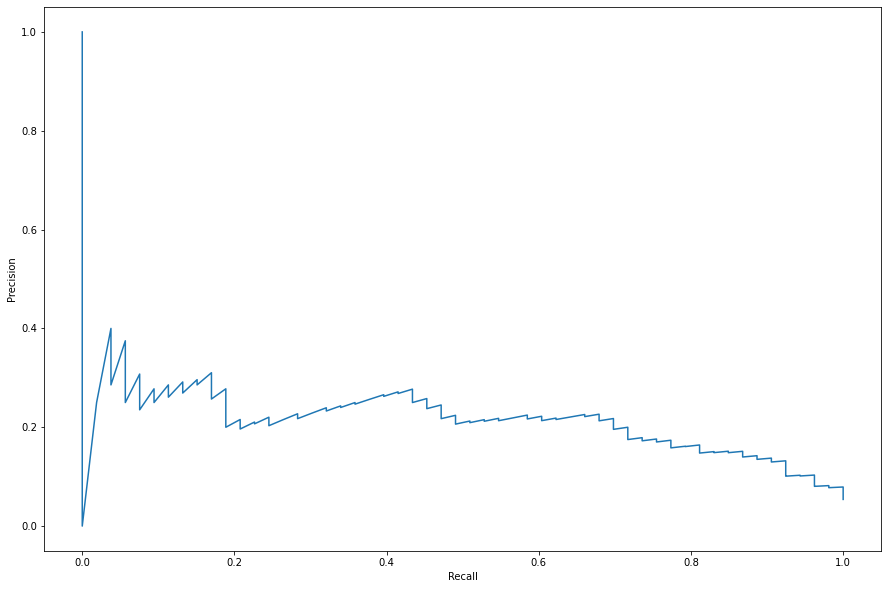

In [373]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'recall'
cross_val = [5]

for cv_value in cross_val:

    # grid search
    grid_search_clf = grid_search(reg_log, param_log, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled, y_train) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled)
    y_pred_proba = best_est.predict_proba(X_train_scaled)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]

    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)


    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
\n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(recall_c, precision_c)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    print(classification_report(y_train, y_pred))
    print(classification_report(y_test, y_pred_test))

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7721591332601124 
 Pozostałe score'y: {'f1': 0.7721591332601124, 'recall': 0.7963363606021747, 'precision': 0.7494768085387593, 'accuracy': 0.765048084613451, 'roc_auc': 0.8515316633117409} 
 Najlepsze parametry: {} 
 Macierz kontyngencji:
[[2771 1000]
 [ 772 2999]]
Macierz na zbiorze testowym:
[[685 244]
 [  9  44]]
F1 score dla zbioru testowego:  0.2580645161290323
ROC AUC score dla zbioru testowego:  0.8507423279241221
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      3771
           1       0.75      0.80      0.77      3771

    accuracy                           0.77      7542
   macro avg       0.77      0.77      0.76      7542
weighted avg       0.77      0.77      0.76      7542

              precision    recall  f1-sco

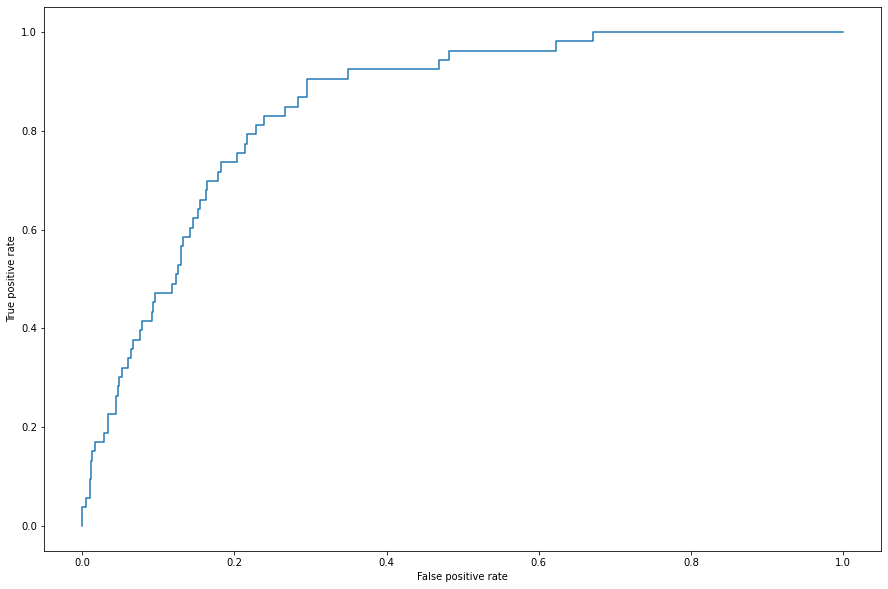

In [374]:
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    ros = RandomOverSampler(random_state=42)
    X_train_scaled_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(reg_log, param_log, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_ros, y_train_ros) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_ros)
    y_pred_proba = best_est.predict_proba(X_train_scaled_ros)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_ros).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_ros, y_pred))
    print("Macierz na zbiorze testowym:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_ros, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 156), (1, 156)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.760324271577995 
 Pozostałe score'y: {'f1': 0.760324271577995, 'recall': 0.7832661290322581, 'precision': 0.7505775248933143, 'accuracy': 0.7598054275473631, 'roc_auc': 0.849304110301769} 
 Najlepsze parametry: {} 
 Macierz kontyngencji:
[[648 281]
 [  8  45]]
Macierz dla testowego:
[[120  36]
 [ 24 132]]
F1 score dla zbioru testowego:  0.237467018469657
ROC AUC score dla zbioru testowego:  0.831975953043443
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       156
           1       0.79      0.85      0.81       156

    accuracy                           0.81       312
   macro avg       0.81      0.81      0.81       312
weighted avg       0.81      0.81      0.81       312

              precision    recall  f1-score   support

  

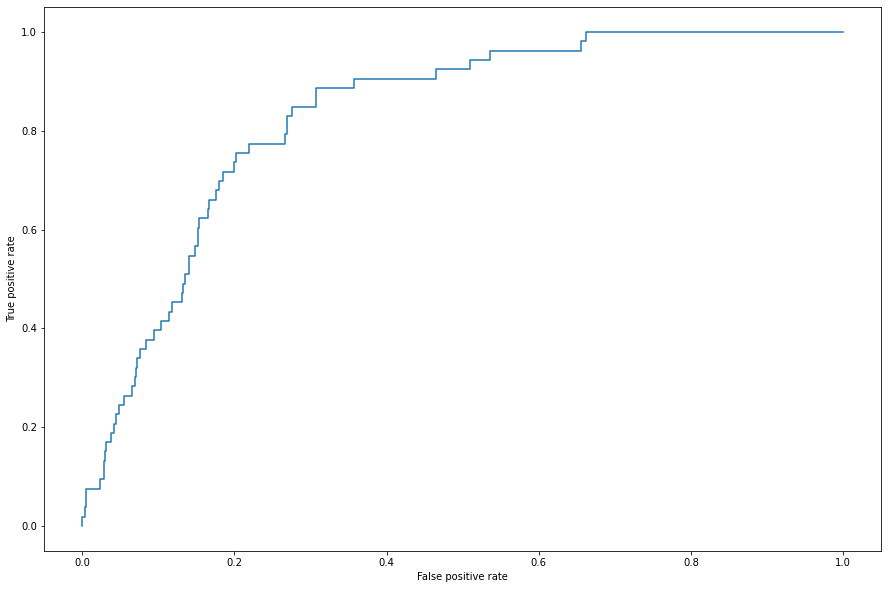

In [375]:
# grid search z undersamplingiem
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    rus = RandomUnderSampler(random_state=42)
    X_train_scaled_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(reg_log, param_log, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_rus, y_train_rus) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_rus)
    y_pred_proba = best_est.predict_proba(X_train_scaled_rus)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_rus).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Macierz dla testowego:")
    print(confusion_matrix(y_train_rus, y_pred))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_rus, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

Liczba kroswalidacji: 5 
 Liczba obserwacji w zbiorze treningowym: [(0, 3771), (1, 3771)] 
 Liczba obserwacji w zbiorze testowym: [(0, 929), (1, 53)] 
 Sprawdzana metryka: f1 
 Najlepsza wartość metryki: 0.7949656398630764 
 Pozostałe score'y: {'f1': 0.7949656398630764, 'recall': 0.8289605986614438, 'precision': 0.7637874204708908, 'accuracy': 0.7862634977051923, 'roc_auc': 0.8598198721532657} 
 Najlepsze parametry: {} 
 Macierz kontyngencji:
[[2807  964]
 [ 635 3136]]
Macierz na zbiorze testowyn:
[[694 235]
 [ 11  42]]
F1 score dla zbioru testowego:  0.2545454545454545
ROC AUC score dla zbioru testowego:  0.8479192477202104
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3771
           1       0.76      0.83      0.80      3771

    accuracy                           0.79      7542
   macro avg       0.79      0.79      0.79      7542
weighted avg       0.79      0.79      0.79      7542

              precision    recall  f1-sc

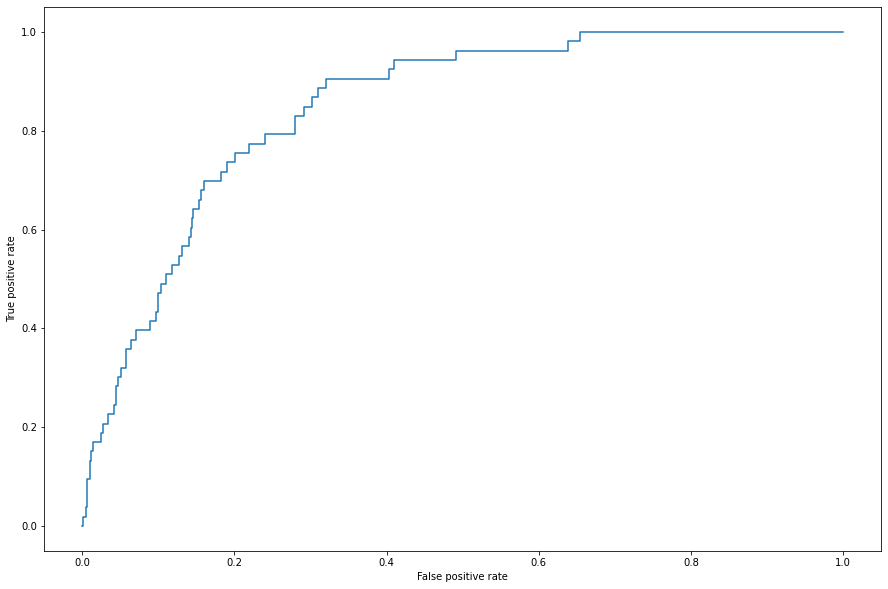

In [376]:
# grid search z SMOTE
scorer = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
refit = 'f1'
cross_val = [5]

for cv_value in cross_val:
    
    #Oversampling
    smt = SMOTE(random_state=42)
    X_train_scaled_smt, y_train_smt= smt.fit_resample(X_train_scaled, y_train)
    
    # grid search
    grid_search_clf = grid_search(reg_log, param_log, scorer, refit = refit, cross_val = cv_value)
    grid_search_clf.fit(X_train_scaled_smt, y_train_smt) # w drzewie nie muszą być dane zestandaryzowanne
    best_est = grid_search_clf.best_estimator_
    
    
    # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search_clf.cv_results_[scorer_rank].argmin()
    for sc in scorer:
        scorer_name = 'mean_test_' + sc
        scorer_value = grid_search_clf.cv_results_[scorer_name][rank_min]
        slownik_score[sc] = scorer_value

    #predykcja dla najlepszego estymatora wg recall
    y_pred = best_est.predict(X_train_scaled_smt)
    y_pred_proba = best_est.predict_proba(X_train_scaled_smt)[:,1]
    
    y_pred_test = best_est.predict(X_test_scaled)
    y_pred_proba_test = best_est.predict_proba(X_test_scaled)[:,1]


    precision_c, recall_c, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
    fpr, tpr, tresholds_r = roc_curve(y_test, y_pred_proba_test)

    print(f"Liczba kroswalidacji: {cv_value} \n \
Liczba obserwacji w zbiorze treningowym: {sorted(Counter(y_train_smt).items())} \n \
Liczba obserwacji w zbiorze testowym: {sorted(Counter(y_test).items())} \n \
Sprawdzana metryka: {refit} \n \
Najlepsza wartość metryki: {grid_search_clf.best_score_} \n \
Pozostałe score'y: {slownik_score} \n \
Najlepsze parametry: {grid_search_clf.best_params_} \n \
Macierz kontyngencji:")
    print(confusion_matrix(y_train_smt, y_pred))
    print("Macierz na zbiorze testowyn:")
    print(confusion_matrix(y_test, y_pred_test))
    print('F1 score dla zbioru testowego: ', f1_score(y_test, y_pred_test))
    print('ROC AUC score dla zbioru testowego: ', roc_auc_score(y_test, y_pred_proba_test))
#     plt.figure(figsize=(15, 10))
#     plt.plot(recall_c, precision_c)
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
    print(classification_report(y_train_smt, y_pred))
    print(classification_report(y_test, y_pred_test))
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

In [252]:
# # Możliwe metryki do wybrania w GridSearch
# import sklearn.metrics as m
# m.get_scorer_names()

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f - rozkmina na temat micro, macro, weighted f1 - chyba z tego wychodzi, że powinniśmy brać macro